In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

In [2]:
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_palette('muted')
sns.set_color_codes('muted')

In [5]:
## Desktop
filepath = '/Users/frankanayet/Google Drive/NLineData/Beh_Data/Replication'
os.chdir(filepath)

In [6]:
print 'Pandas version ' + pd.__version__

Pandas version 0.17.1


In [7]:
filenames = glob.glob('Nline_*.mat')
#print filenames
#index to isolate subj numbers
data_dict = {}
for i in filenames:
    id1 = filenames[0].find('_') + 1
    id2 = filenames[0].find('-')
    sub_nbr = i[id1:id2]
    sub_name = i
    s_id = 's_'+sub_nbr
    data_dict[s_id] = io.loadmat(sub_name)

#sub_name = filenames[0] #This will be changed to a loop for all subjects later
#mat = io.loadmat(sub_name)
#data_dict.keys()

In [8]:
sub_ex = data_dict.keys()[-1]

In [9]:
#for i in data_dict:
#    data_dict[i].pop('__header__')
#    data_dict[i].pop('__version__')
#    data_dict[i].pop('__globals__')
#data_dict['s_00011'].keys()

In [10]:
## The indexes of zeros are as follows [0][0][x][y][z][0] The x y z are the 3 dimensions of the data 3d matrix the zeros are padding
data_dict[sub_ex]['p']['NlineResults'][0][0][1][13][2][0][0]
#len(data_dict[sub_ex]['p']['NlineResults'][0][0][:])

0

In [11]:
#data_dict[sub_ex]['p'].dtype.names

In [12]:
#Comment this out for include all subjects
#del data_dict['s_']

In [13]:
del data_dict['s_04104']
del data_dict['s_04116']
del data_dict['s_04117']

In [14]:
cons_time = data_dict[sub_ex]['p']['consider'][0][0][0][0]
dec_time = data_dict[sub_ex]['p']['decision'][0][0][0][0]

In [15]:
new_dat = {}
#new_df = {}
for s in data_dict:
    tasks = ['NlineResults']
    new_dat[s]={}
    #new_df[s] = {}
    for task in tasks:
        dat = data_dict[s]['p'][task]
        num_fields = len(data_dict[s]['p'][task][0][0][0])
        dat_names = []
        for k in range(0,num_fields):
            dat_names.append(dat[0][0][0][k][0][0])
        new_dat[s][task] = {}
        runs = data_dict[s]['p']['runs'][0][0][0][0]
        for run in range(0,runs):
            run_name = 'Run_'+str(run)
            new_dat[s][task][run_name] = {}
            for i in range(0,len(dat_names)):
                new_dat[s][task][run_name][dat_names[i]] = []
                for j in range(0,len(dat[0][0][:])-1):
                    if dat_names[i] == 'catch_probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run])
                    elif dat_names[i] == 'Probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
                    else:
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
#legible access to the data
Nline = 'NlineResults' #numberline

In [16]:
#new_dat[sub_ex]['NlineResults']['Run_1'].keys()

In [17]:
new_dat[sub_ex]['NlineResults']['Run_1']['Probe']

[array([3], dtype=uint8),
 array([11], dtype=uint8),
 array([77], dtype=uint8),
 array([45], dtype=uint8),
 array([28], dtype=uint8),
 array([74], dtype=uint8),
 array([85], dtype=uint8),
 array([21], dtype=uint8),
 array([60], dtype=uint8),
 array([7], dtype=uint8),
 array([98], dtype=uint8),
 array([36], dtype=uint8),
 array([65], dtype=uint8),
 array([33], dtype=uint8),
 array([57], dtype=uint8),
 array([90], dtype=uint8),
 u'ox',
 u'or',
 u'as',
 u'my',
 u'it',
 u'he',
 u'of',
 u'be',
 u'is',
 u'by',
 u'we',
 u'do',
 u'am',
 u'so',
 u'if',
 u'me',
 array([20], dtype=uint8),
 array([-94], dtype=int16),
 array([-86], dtype=int16),
 array([70], dtype=uint8),
 array([-58], dtype=int16),
 array([80], dtype=uint8),
 array([-34], dtype=int16),
 array([-28], dtype=int16),
 array([-78], dtype=int16),
 array([14], dtype=uint8),
 array([48], dtype=uint8),
 array([54], dtype=uint8),
 array([-10], dtype=int16),
 array([96], dtype=uint8),
 array([30], dtype=uint8),
 array([-44], dtype=int16)]

In [18]:
#new_dat[sub_ex]['NlineResults']['Run_1']['catch_probe']

In [19]:
#new_dat[sub_ex]['NlineResults']['Run_1']['MouseTrack']

In [20]:
subj = data_dict.keys()
tasks = [Nline]
tuples = []
rows = len(data_dict[sub_ex]['p'][Nline][0][0][:])-1
for s in subj:
    runs = new_dat[s]['NlineResults'].keys()
    for run in runs:
        for i in range(0,rows):
            tuples.append((s, run, i))
len(tuples)
#iterables = [subj,tasks,runs]
indexes = pd.MultiIndex.from_tuples(tuples, names=['Subj', 'Run', 'Trial'])
nline_cols = len(new_dat[sub_ex][Nline]['Run_0'].keys())

In [21]:
#indexes[90]

In [22]:
#indexes[1][1]

In [23]:
varnames = new_dat[sub_ex][Nline]['Run_0'].keys()

In [24]:
#len(indexes)

In [25]:
# Code empty cells of probes and catch_probes as Nan
Dic_list = []
probes = ['catch_probe', 'MouseTrack', 'Probe']
for data in indexes:
    temp_dict = {}
    for var in varnames:
        if var == probes[0]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
        elif var == probes[1]:
            if new_dat.get(data[0]).get(Nline).get(data[1]).get(var,0) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1])[var] = []
                new_dat.get(data[0]).get(Nline).get(data[1])[var].append(np.array([np.nan]))
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)) <= data[2]:
                new_dat.get(data[0]).get(Nline).get(data[1])[var].append(np.array([np.nan]))
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
        elif var == probes[2]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 1:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 2:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
        else:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
    Dic_list.append(temp_dict)

In [26]:
#Dic_list[10]

In [27]:
#Create dataframe
nline_df = pd.DataFrame(Dic_list, index=indexes)
#sum(nline_df.loc[sub_ex].loc['Run_0'].iloc[0:48]['catch'])

In [28]:
#nline_df.loc[sub_ex].loc['Run_0'].iloc[0:10]['Error']

In [29]:
nline_df.index.names = ['Subject', 'Run', 'Trial']
#nline_df.index.names

In [30]:
#plt.plot(nline_df.loc['s_04102','Run_2',0]['MouseTrack'])

### Create Stim Labels

Data Column Names

In [31]:
nline_df.columns

Index([u'BadPress', u'Block', u'Click', u'Correct', u'Error', u'ITI_onset',
       u'ITI_onset_real', u'Line_pct', u'MouseTrack', u'Move', u'Points',
       u'Probe', u'RT', u'RTHold', u'Response', u'Slow', u'Task', u'TestX',
       u'Trial', u'Wrong', u'catch', u'catch_probe', u'consider_onset',
       u'consider_onset_real', u'decision_end', u'decision_end_real',
       u'decision_onset', u'decision_onset_real', u'hold', u'hold_onset',
       u'hold_onset_real', u'iti', u'mouse_pos'],
      dtype='object')

# Number Line Analyses

### Accuracy & RT

In [32]:
nline_no_miss = nline_df[['Error', 'RT', 'RTHold', 'catch', 'Task', 'Line_pct', 'Response']]
nline_no_miss = nline_no_miss[nline_no_miss['catch']<1]
#len(nline_no_miss)

In [33]:
nline_no_miss = nline_no_miss.replace(-1, np.nan)
nline_no_miss = nline_no_miss.drop('catch', 1)

In [34]:
nline_no_miss['Missed'] = nline_no_miss['Error']
nline_no_miss['Missed'][nline_no_miss['Missed']<1] = 0
#nline_missed

In [35]:
nline_missed = nline_no_miss.loc[nline_no_miss['Missed']==1,:]
position_missed = nline_no_miss.groupby(['Task', 'Line_pct'])
position_missed = position_missed['Missed']

In [36]:
#nline_no_miss['Missed']

In [37]:
responded = nline_no_miss.copy()
responded.loc[:,:] = nline_no_miss.loc[nline_no_miss['Missed']==0,:]
responded['AbsError'] = np.abs(responded['Error'])
#nline_no_miss

//anaconda/lib/python2.7/site-packages/IPython/kernel/zmq/kernelbase.py:213: PerformanceWarning: indexing past lexsort depth may impact performance.
  handler(stream, idents, msg)


In [38]:
responded = responded[pd.notnull(responded['Task'])]

In [39]:
responded.Line_pct.unique()

array([ 0.28,  0.98,  0.21,  0.77,  0.11,  0.07,  0.85,  0.36,  0.74,
        0.03,  0.65,  0.9 ,  0.45,  0.6 ,  0.33,  0.57])

## How many trials missed?

In [41]:
nline_missed['Missed'].groupby(level=0).sum()

Subject
s_04101     4
s_04102    10
s_04103    11
s_04105    15
s_04106    20
s_04107    15
s_04108     1
s_04109     4
s_04110     8
s_04111     2
s_04112     8
s_04113    15
s_04114     3
s_04118     6
s_04119     1
s_04120     9
s_04201     2
s_04202     3
s_04203     9
s_04204     4
s_04205     4
s_04206     3
s_04207     8
s_04208    19
s_04209     3
s_04210     5
s_04211     2
s_04212     3
s_04213     9
s_04214    18
s_04215    14
s_04216     2
s_04217     2
s_04218     3
s_04219     7
s_04220     5
Name: Missed, dtype: float64

In [42]:
missed = nline_missed['Missed'].groupby(level=0).sum()

In [43]:
##Subject Standard Deviations (title for markdown deleted)
#nline_no_miss_subj.std()

In [44]:
##Overall Standard Deviation (deleted from markdown)
#np.mean(nline_no_miss_subj.std())

##How many trials did they actually respond?

Subject s_04102 only answered 6 trials of 4th run

S_04116 seems to have not understood the word task ** Also slope of estimates for N+ (see way below) is 0.4 really far off from a slope close to 1 li the rest of subjects

S_04208 has highest misses of my batch and also has a 0,48 slope(see way below)

S_04117 has 37 missed trials and also has 0.78 slope (see way below)

S_04104 has 37 missed trials but slope in normal range

In [45]:
responded['RT'].groupby(level=0).count()

Subject
s_04101    140
s_04102    102
s_04103    133
s_04105    129
s_04106    124
s_04107    129
s_04108    143
s_04109    140
s_04110    136
s_04111    142
s_04112    136
s_04113    129
s_04114    141
s_04115    144
s_04118    138
s_04119    143
s_04120    135
s_04201    142
s_04202    141
s_04203    135
s_04204    140
s_04205    140
s_04206    141
s_04207    136
s_04208    125
s_04209    141
s_04210    139
s_04211    142
s_04212    141
s_04213    135
s_04214    126
s_04215    130
s_04216    142
s_04217    142
s_04218    141
s_04219    137
s_04220    139
dtype: int64

# RT Histograms

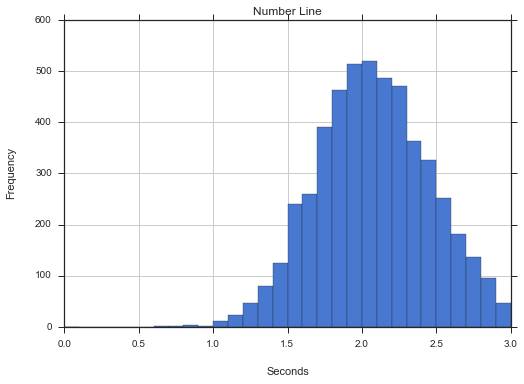

In [46]:
#pd.options.display.mpl_style = 'default'
responded['RT'].hist(bins=30, range=[0,3])
plt.ylim([0,600])
plt.title('Number Line')
plt.xlabel('Seconds', labelpad = 18)
plt.ylabel('Frequency', labelpad = 18)

## Missed by position (across subjects)

In [47]:
position_missed.sum()

Task  Line_pct
1     0.03         4
      0.07        10
      0.11         5
      0.21         6
      0.28         5
      0.33         9
      0.36         7
      0.45         5
      0.57         3
      0.60         1
      0.65         2
      0.74         4
      0.77        13
      0.85         5
      0.90         6
      0.98         5
2     0.03         6
      0.07         4
      0.11         4
      0.21        11
      0.28         6
      0.33         3
      0.36         3
      0.45         3
      0.57         2
      0.60         2
      0.65         4
      0.74         5
      0.77         8
      0.85        11
      0.90         5
      0.98         6
3     0.03         6
      0.07        10
      0.11         6
      0.21         3
      0.28         2
      0.33         2
      0.36         4
      0.45         4
      0.57         5
      0.60         4
      0.65         6
      0.74         7
      0.77         3
      0.85         4
      0.90        1

In [48]:
missed_position = position_missed.sum()
pos_miss_1 = missed_position.iloc[0:16]
pos_miss_2 = missed_position.iloc[16:32]
pos_miss_3 = missed_position.iloc[32:48]
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
#len(pos_miss_1)

The following code gives me a list for the palette and I can iterate through it for the colors I need

In [49]:
pal = sns.color_palette()

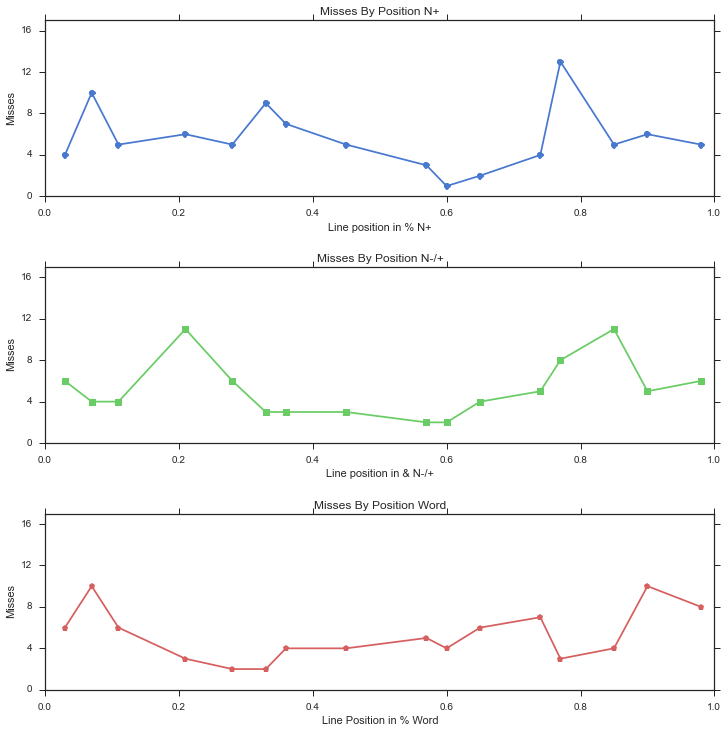

In [50]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, pos_miss_1, 'o-', color=pal[0])
plt.title('Misses By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,17])
plt.yticks(([0,4,8,12,16]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, pos_miss_2, color=pal[1], marker='s')
plt.title('Misses By Position N-/+')
plt.xlabel('Line position in & N-/+', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,17])
plt.yticks(([0,4,8,12,16]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, pos_miss_3, color=pal[2], marker='p')
plt.title('Misses By Position Word')
plt.xlabel('Line Position in % Word', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,17])
plt.yticks(([0,4,8,12,16]))

plt.subplots_adjust(hspace=.4)

## RTHold missed analysis

##RTHold  MIssed Subject Average

In [51]:
nline_missed['RTHold'].groupby(level=0).mean()

Subject
s_04101    0.760889
s_04102    1.330117
s_04103    0.575732
s_04105    0.623258
s_04106    0.736115
s_04107    0.550096
s_04108    0.369036
s_04109    1.114158
s_04110    0.602176
s_04111    0.688119
s_04112    0.403312
s_04113    0.728374
s_04114    0.600681
s_04118    0.704647
s_04119    0.773352
s_04120    0.948407
s_04201    1.150705
s_04202    0.518021
s_04203    0.556139
s_04204    1.089988
s_04205    0.591679
s_04206    0.398903
s_04207    0.362602
s_04208    0.373545
s_04209    0.394067
s_04210    0.461892
s_04211    0.482860
s_04212    1.264613
s_04213    1.199714
s_04214    0.625229
s_04215    0.734159
s_04216    0.548096
s_04217    0.435670
s_04218    1.193555
s_04219    0.977487
s_04220    1.012856
Name: RTHold, dtype: float64

##RTHold Missed Overall Average

In [52]:
np.mean(nline_missed['RTHold'].groupby(level=0).mean())

0.7188957191823957

In [53]:
responded.loc[:,'RT_Diff'] = responded['RT']-responded['RTHold']

##Averages by subjected for responded trials

In [54]:
responded[['Error', 'RT', 'RTHold', 'RT_Diff', 'AbsError']].groupby(level=0).mean()

,Error,RT,RTHold,RT_Diff,AbsError
Subject,,,,,
s_04101,0.000367,2.126994,0.438679,1.688315,0.014450
s_04102,-0.001154,2.086361,0.562893,1.523468,0.029723
s_04103,-0.005674,2.213000,0.419749,1.793251,0.014655
s_04105,-0.004287,2.187713,0.453583,1.734130,0.018730
s_04106,-0.005307,2.278004,0.464659,1.813344,0.021909
s_04107,0.001220,2.255703,0.419663,1.836041,0.019135
s_04108,-0.005221,1.916144,0.392673,1.523472,0.018594
s_04109,-0.009659,1.953166,0.394496,1.558670,0.029116
s_04110,-0.000969,2.047309,0.440873,1.606436,0.028729


##Overall Averages

In [55]:
np.mean(responded[['Error', 'RT', 'RTHold','RT_Diff','AbsError']].groupby(level=0).mean())

Error       0.002219
RT          2.082730
RTHold      0.438482
RT_Diff     1.644249
AbsError    0.024785
dtype: float64

## Plots by position

In [56]:
position_tasks = responded.groupby(['Task', 'Line_pct'])

In [57]:
n_subj = len(responded.groupby(level=0))

In [58]:
n_subj

37

In [59]:
#responded.iloc[0:20]

##RTs by position medians (across subjects)

In [60]:
position_tasks['RT'].median()

Task  Line_pct
1     0.03        2.102201
      0.07        2.210438
      0.11        2.195213
      0.21        2.193954
      0.28        2.095175
      0.33        2.128553
      0.36        2.167418
      0.45        1.827100
      0.57        1.862780
      0.60        1.896780
      0.65        2.027066
      0.74        2.112983
      0.77        2.211744
      0.85        2.260218
      0.90        2.265626
      0.98        2.115418
2     0.03        2.210410
      0.07        2.277149
      0.11        2.229629
      0.21        2.163071
      0.28        2.145060
      0.33        2.043939
      0.36        2.002402
      0.45        1.798211
      0.57        1.913324
      0.60        2.017659
      0.65        2.051631
      0.74        2.110491
      0.77        2.163175
      0.85        2.176985
      0.90        2.248907
      0.98        2.227097
3     0.03        2.244262
      0.07        2.199088
      0.11        2.193715
      0.21        2.048521
      0.28   

In [61]:
rts = position_tasks['RT'].median()
rts_std = position_tasks['RT'].std()
rts_se = rts_std/np.sqrt(n_subj)

Next code is to calculate standard error by first computing the mean RT for each subject and then taking the std of the subjects.
First I calculate the mean for each subject and each position (3 numbers)

In [144]:
D = {}
for sub in responded.groupby(level=0).groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D.get(task,0) == 0:
            D[task] = {}
        if D[task].get(stim,0) == 0:
            D[task][stim] = {'raw':[],'medianRT':[], 'stdRT': [], 'error_raw':[], 'stdError':[], 'medianError':[]}
        D[task][stim]['raw'].append(position_tasks.get_group((task,stim)).loc[sub]['RT'].mean())
        D[task][stim]['error_raw'].append(position_tasks.get_group((task,stim)).loc[sub]['AbsError'].mean())

In [127]:
rts_1

array([ 2.10220139,  2.21043751,  2.19521272,  2.19395383,  2.09517485,
        2.12855264,  2.16741754,  1.82709998,  1.86278007,  1.89677969,
        2.02706575,  2.11298293,  2.21174353,  2.26021803,  2.26562639,
        2.11541816])

Then I take the std deviation between sebjects and also the median between subjects

In [178]:
np.sort(D[task].keys())

array([ 0.03,  0.07,  0.11,  0.21,  0.28,  0.33,  0.36,  0.45,  0.57,
        0.6 ,  0.65,  0.74,  0.77,  0.85,  0.9 ,  0.98])

In [179]:
for task in D:
    #print task
    for stim in np.sort(D[task].keys()):
        D[task][stim]['stdRT'] = np.nanstd(D[task][stim]['raw'])
        D[task][stim]['medianRT'] = np.nanmedian(D[task][stim]['raw'])
        D[task][stim]['stdError'] = np.nanstd(D[task][stim]['error_raw'])
        D[task][stim]['medianError'] = np.nanmedian(D[task][stim]['error_raw'])

In [180]:
D[1.0][0.03]['medianRT']

2.0540434428645917

In [182]:
rts_1 = []
rts_2 = []
rts_3 = []
for stim in np.sort(D[1].keys()):
    rts_1.append(D[1][stim]['medianRT'])
for stim in np.sort(D[2].keys()):
    rts_2.append(D[2][stim]['medianRT'])
for stim in np.sort(D[3].keys()):
    rts_3.append(D[3][stim]['medianRT'])

In [183]:
rts_std_1 = []
rts_std_2 = []
rts_std_3 = []
for stim in np.sort(D[1].keys()):
    rts_std_1.append(D[1][stim]['stdRT'])
for stim in np.sort(D[2].keys()):
    rts_std_2.append(D[2][stim]['stdRT'])
for stim in np.sort(D[3].keys()):
    rts_std_3.append(D[3][stim]['stdRT'])

In [184]:
rts_se_1 = rts_std_1/np.sqrt(n_subj)
rts_se_2 = rts_std_2/np.sqrt(n_subj)
rts_se_3 = rts_std_3/np.sqrt(n_subj)

In [185]:
#rts.iloc[10]

In [186]:
rts_1_med = rts.iloc[0:16]
rts_2_med = rts.iloc[16:32]
rts_3_med = rts.iloc[32:48]

In [187]:
rts_1

[2.0540434428645917,
 2.2097876070765778,
 2.1494493215965726,
 2.2073161676034943,
 2.189062376409614,
 2.1599245296092704,
 2.1190625393452742,
 1.8158223813710113,
 1.9091832683188841,
 1.9532499949952278,
 2.0597516351845115,
 2.0986273312785975,
 2.2192324247444049,
 2.2779078931780532,
 2.2823811948716561,
 2.1600205705811582]

In [188]:
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
len(rts_1)
xvals1 = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.900, 0.980])

##Overall median

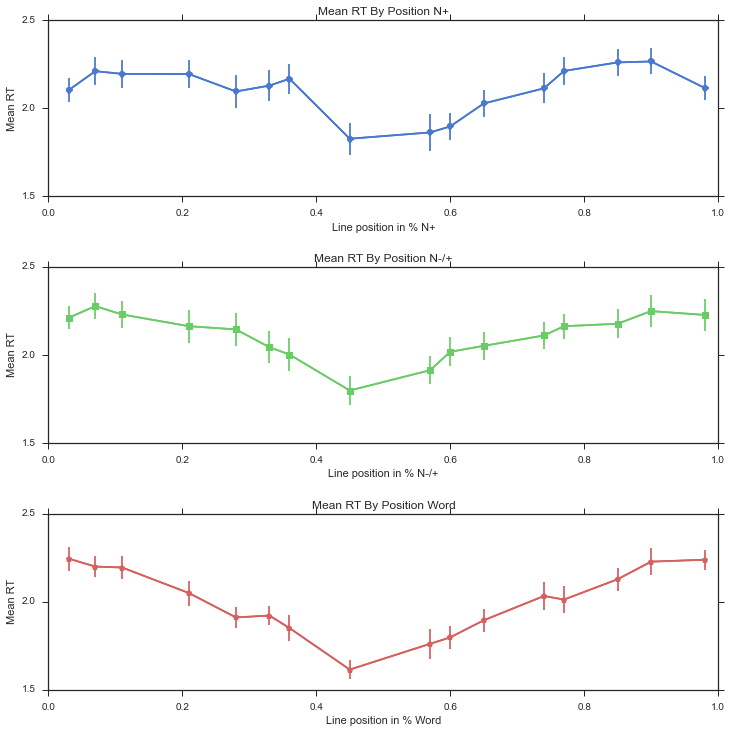

In [189]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, rts_1_med, 'o-', color=pal[0])
fig1.errorbar(xvals, rts_1_med, yerr=rts_se_1*1.96)
plt.title('Mean RT By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, rts_2_med, color=pal[1], marker='s')
fig2.errorbar(xvals, rts_2_med, yerr=rts_se_2*1.96, color=pal[1])
plt.title('Mean RT By Position N-/+')
plt.xlabel('Line position in % N-/+', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, rts_3_med, color=pal[2], marker='p')
fig3.errorbar(xvals, rts_3_med, yerr=rts_se_3*1.96, color=pal[2])
plt.title('Mean RT By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

plt.subplots_adjust(hspace=.4)

In [190]:
rts_1_med = rts_1_med.get_values()
rts_2_med = rts_2_med.get_values()
rts_3_med = rts_3_med.get_values()

In [191]:
rts_1corr_med = rts_1_med - rts_3_med
rts_2corr_med = rts_2_med - rts_3_med

([<matplotlib.axis.YTick at 0x1173b8ed0>,
 <a list of 5 Text yticklabel objects>)

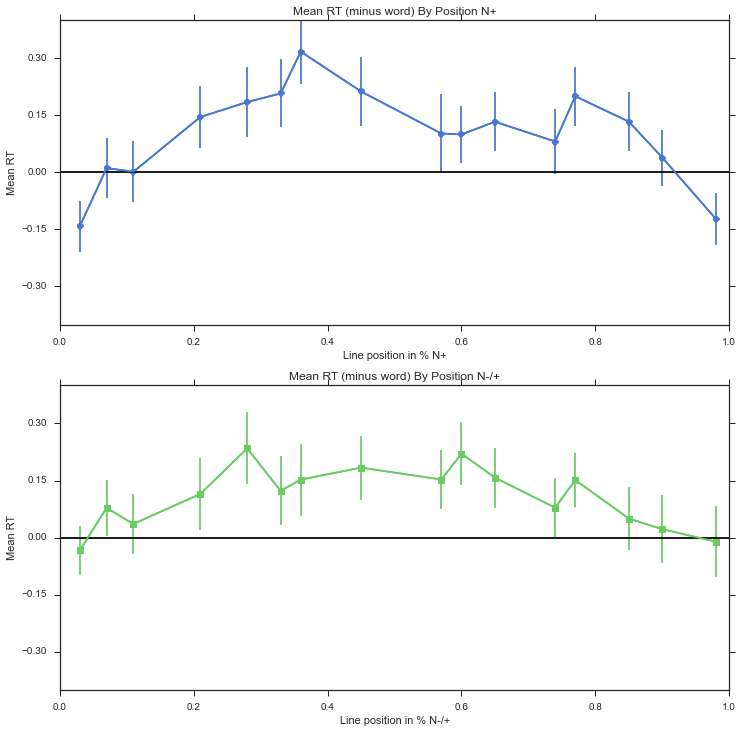

In [192]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(2,1,1)
fig1.plot(xvals, rts_1corr_med, 'o-', color=pal[0])
fig1.plot([0,1], [0,0], color='black', linestyle='-')
fig1.errorbar(xvals, rts_1corr_med, yerr=rts_se_1*1.96)
plt.title('Mean RT (minus word) By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([-0.40,0.40])
plt.yticks(([-0.3,-0.15,0,0.15,0.3]))

fig2 = plt.subplot(2,1,2)
fig2.plot(xvals, rts_2corr_med, color=pal[1], marker='s')
fig2.plot([0,1], [0,0], color='black', linestyle='-')
fig2.errorbar(xvals, rts_2corr_med, yerr=rts_se_2*1.96, color=pal[1])
plt.title('Mean RT (minus word) By Position N-/+')
plt.xlabel('Line position in % N-/+', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([-0.40,0.40])
plt.yticks(([-0.3,-0.15,0,0.15,0.3]))

## Median of subject means

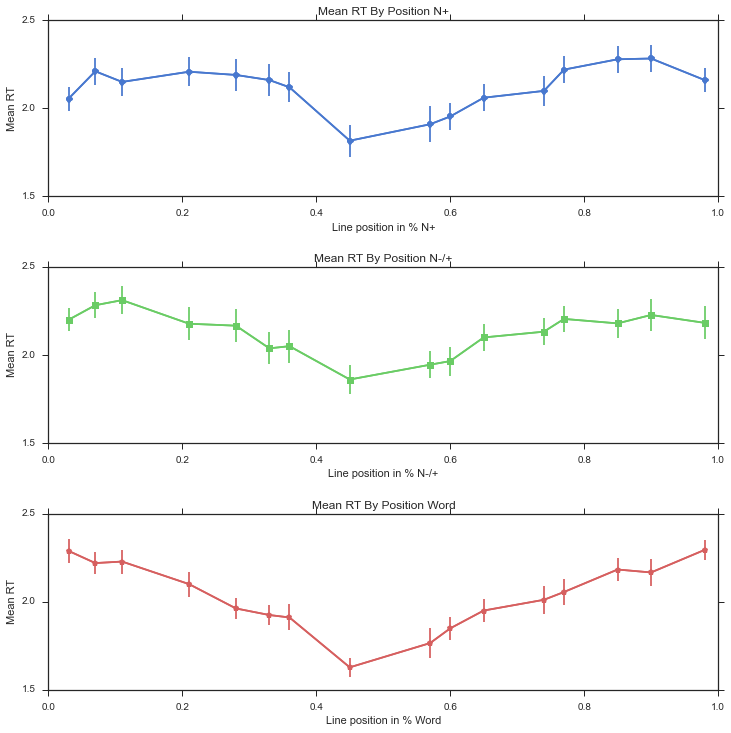

In [193]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, rts_1, 'o-', color=pal[0])
fig1.errorbar(xvals, rts_1, yerr=rts_se_1*1.96)
plt.title('Mean RT By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, rts_2, color=pal[1], marker='s')
fig2.errorbar(xvals, rts_2, yerr=rts_se_2*1.96, color=pal[1])
plt.title('Mean RT By Position N-/+')
plt.xlabel('Line position in % N-/+', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, rts_3, color=pal[2], marker='p')
fig3.errorbar(xvals, rts_3, yerr=rts_se_3*1.96, color=pal[2])
plt.title('Mean RT By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

plt.subplots_adjust(hspace=.4)

In [194]:
rts_1 = np.asarray(rts_1)
rts_2 = np.asarray(rts_2)
rts_3 = np.asarray(rts_3)
rts_1

array([ 2.05404344,  2.20978761,  2.14944932,  2.20731617,  2.18906238,
        2.15992453,  2.11906254,  1.81582238,  1.90918327,  1.95324999,
        2.05975164,  2.09862733,  2.21923242,  2.27790789,  2.28238119,
        2.16002057])

In [195]:
rts_1corr = rts_1 - rts_3
rts_2corr = rts_2 - rts_3

In [196]:
rts_1corr

array([-0.23401489, -0.0090918 , -0.07803911,  0.10779689,  0.22759649,
        0.23586563,  0.20881048,  0.18864803,  0.14430337,  0.10501152,
        0.1102716 ,  0.08811786,  0.16443534,  0.09560475,  0.1166849 ,
       -0.13368129])

([<matplotlib.axis.YTick at 0x115dff290>,
 <a list of 5 Text yticklabel objects>)

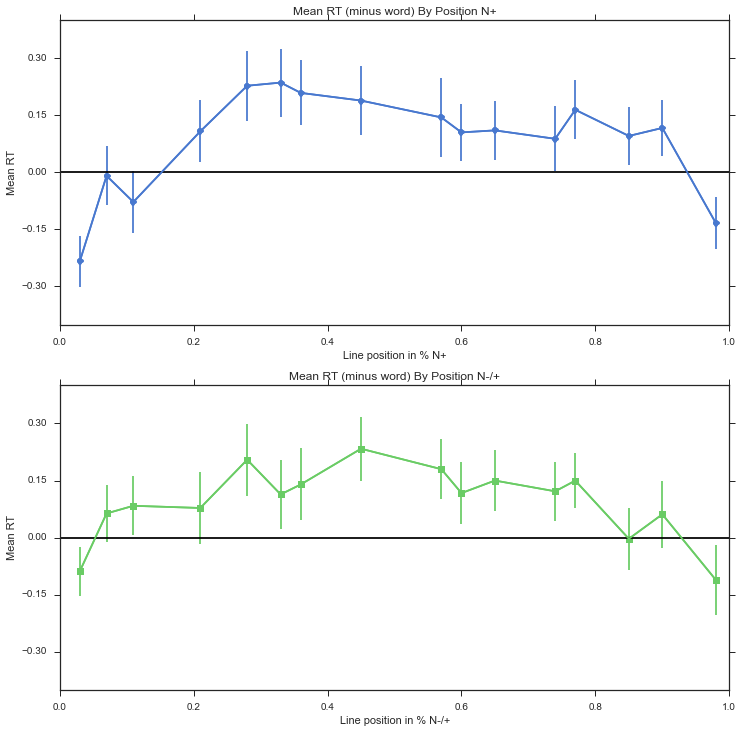

In [197]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(2,1,1)
fig1.plot(xvals, rts_1corr, 'o-', color=pal[0])
fig1.plot([0,1], [0,0], color='black', linestyle='-')
fig1.errorbar(xvals, rts_1corr, yerr=rts_se_1*1.96)
plt.title('Mean RT (minus word) By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([-0.40,0.40])
plt.yticks(([-0.3,-0.15,0,0.15,0.3]))

fig2 = plt.subplot(2,1,2)
fig2.plot(xvals, rts_2corr, color=pal[1], marker='s')
fig2.plot([0,1], [0,0], color='black', linestyle='-')
fig2.errorbar(xvals, rts_2corr, yerr=rts_se_2*1.96, color=pal[1])
plt.title('Mean RT (minus word) By Position N-/+')
plt.xlabel('Line position in % N-/+', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([-0.40,0.40])
plt.yticks(([-0.3,-0.15,0,0.15,0.3]))

## Error plots

In [200]:
error = position_tasks['AbsError'].median()
error_std = position_tasks['AbsError'].std()
error_se = error_std/np.sqrt(n_subj)

In [201]:
error_1 = error.iloc[0:16]
error_2 = error.iloc[16:32]
error_3 = error.iloc[32:48]
error_se_1 = error_se.iloc[0:16]
error_se_2 = error_se.iloc[16:32]
error_se_3 = error_se.iloc[32:48]

In [202]:
len(D[1].keys())

16

In [203]:
error_1_med = []
error_2_med = []
error_3_med = []
for stim in np.sort(D[1].keys()):
    error_1_med .append(D[1][stim]['medianError'])
for stim in np.sort(D[2].keys()):
    error_2_med .append(D[2][stim]['medianError'])
for stim in np.sort(D[3].keys()):
    error_3_med .append(D[3][stim]['medianError'])

In [204]:
error_1_med

[0.012752224423450699,
 0.019018929951961399,
 0.024975768239797188,
 0.036107649272795854,
 0.043244289984729178,
 0.032646150752272694,
 0.046120622621484898,
 0.015281785579035497,
 0.018967500361366702,
 0.018738553874139623,
 0.033558702080834925,
 0.025032770834292634,
 0.02539215945655186,
 0.02848366674197152,
 0.019170245653558109,
 0.0085004638614017969]

In [205]:
error_1 = error_1.get_values()
error_2 = error_2.get_values()
error_3 = error_3.get_values()

## PAE by position (median across subjects)

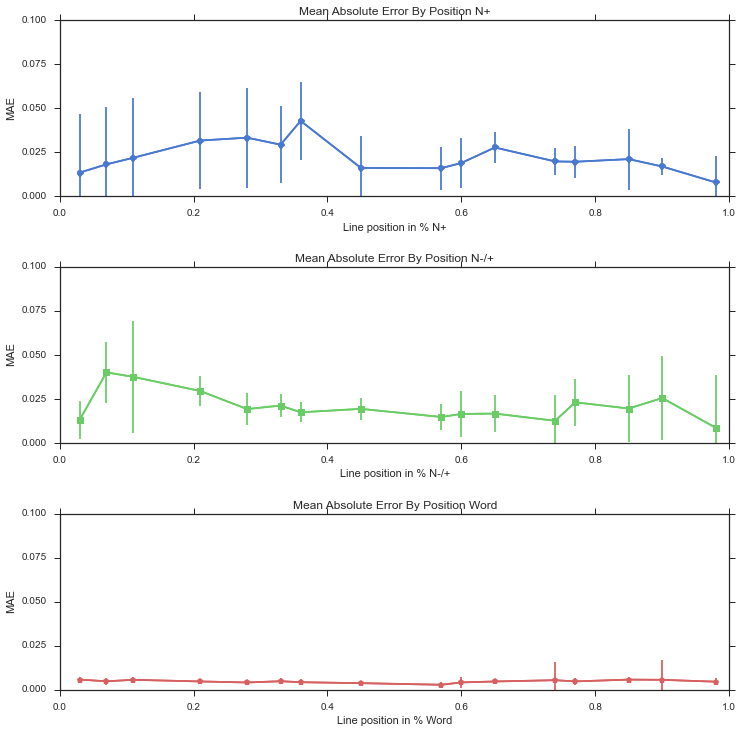

In [206]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, error_1, 'o-', color=pal[0])
fig1.errorbar(xvals, error_1, yerr=error_se_1*1.96, color=pal[0])
plt.title('Mean Absolute Error By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, error_2, color=pal[1], marker='s')
fig2.errorbar(xvals, error_2, yerr=error_se_2*1.96, color=pal[1])
plt.title('Mean Absolute Error By Position N-/+')
plt.xlabel('Line position in % N-/+', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, error_3, color=pal[2], marker='p')
fig3.errorbar(xvals, error_3, yerr=error_se_3*1.96, color=pal[2])
plt.title('Mean Absolute Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

plt.subplots_adjust(hspace=.4)

next code is doing the average for each subject first and then taking the standard deviation

In [207]:
error_std_1 = []
error_std_2 = []
error_std_3 = []
for stim in np.sort(D[1].keys()):
    error_std_1.append(D[1][stim]['stdError'])
for stim in np.sort(D[2].keys()):
    error_std_2.append(D[2][stim]['stdError'])
for stim in np.sort(D[3].keys()):
    error_std_3.append(D[3][stim]['stdError'])

In [211]:
error_se1_med = error_std_1/np.sqrt(n_subj)
error_se2_med = error_std_2/np.sqrt(n_subj)
error_se3_med = error_std_3/np.sqrt(n_subj)

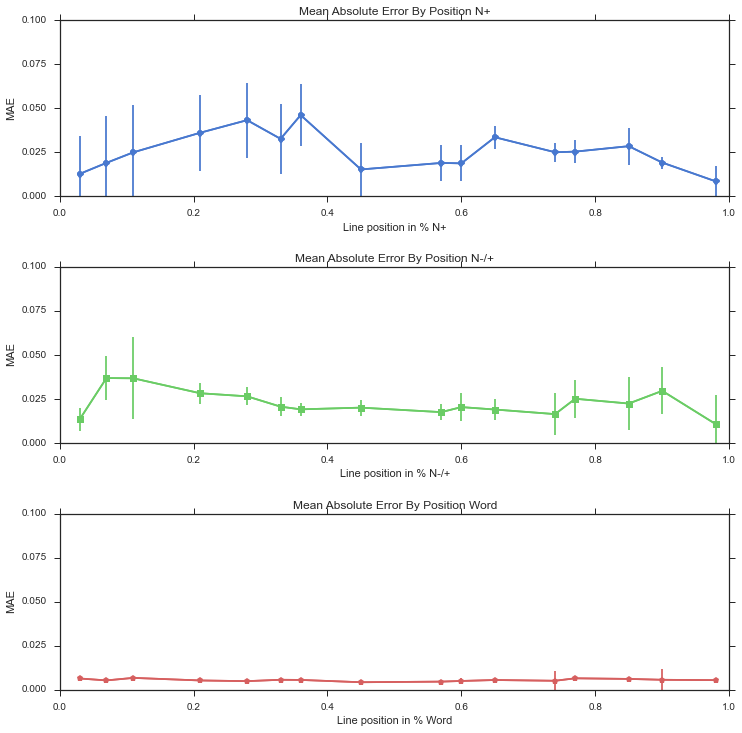

In [212]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, error_1_med, 'o-', color=pal[0])
fig1.errorbar(xvals, error_1_med, yerr=error_se1_med*1.96, color=pal[0])
plt.title('Mean Absolute Error By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, error_2_med, color=pal[1], marker='s')
fig2.errorbar(xvals, error_2_med, yerr=error_se2_med*1.96, color=pal[1])
plt.title('Mean Absolute Error By Position N-/+')
plt.xlabel('Line position in % N-/+', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075, 0.1]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, error_3_med, color=pal[2], marker='p')
fig3.errorbar(xvals, error_3_med, yerr=error_se3_med*1.96, color=pal[2])
plt.title('Mean Absolute Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

plt.subplots_adjust(hspace=.4)

###Signed error is calculated as Response - Correct

In [217]:
signerror = position_tasks['Error'].median()
STDsignerror = position_tasks['Error'].std()
signerror_1 = signerror.iloc[0:16]
signerror_2 = signerror.iloc[16:32]
signerror_3 = signerror.iloc[32:48]
STDsignerror_1 = STDsignerror.iloc[0:16]
STDsignerror_2 = STDsignerror.iloc[16:32]
STDsignerror_3 = STDsignerror.iloc[32:48]
signerror_1 = signerror_1.get_values()
signerror_2 = signerror_2.get_values()
signerror_3 = signerror_3.get_values()
STDsignerror_1 = STDsignerror_1.get_values()
STDsignerror_2 = STDsignerror_2.get_values()
STDsignerror_3 = STDsignerror_3.get_values()
SEsignerror_1 = STDsignerror_1/np.sqrt(n_subj)
SEsignerror_2 = STDsignerror_2/np.sqrt(n_subj)
SEsignerror_3 = STDsignerror_3/np.sqrt(n_subj)

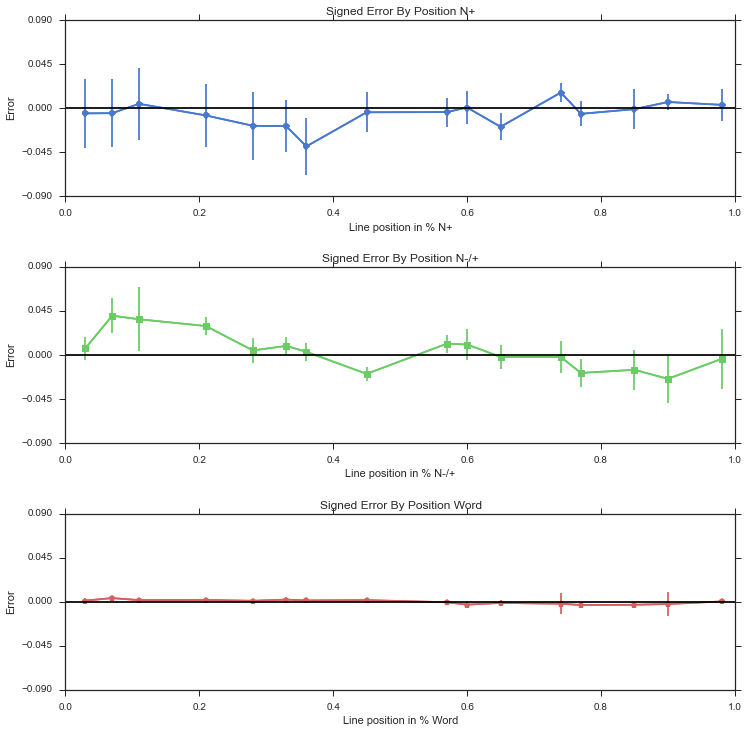

In [218]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, signerror_1, 'o-', color=pal[0])
fig1.errorbar(xvals, signerror_1, yerr=SEsignerror_1*1.96, color=pal[0])
fig1.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Signed Error By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, signerror_2, color=pal[1], marker='s')
fig2.errorbar(xvals, signerror_2, yerr=SEsignerror_2*1.96, color=pal[1])
fig2.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Signed Error By Position N-/+')
plt.xlabel('Line position in % N-/+', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, signerror_3, color=pal[2], marker='p')
fig3.errorbar(xvals, signerror_3, yerr=SEsignerror_3*1.96, color=pal[2])
fig3.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Signed Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

plt.subplots_adjust(hspace=.4)

 Positive values in the graph above mean participant overestimated, negative values mean participant underestimated. In the -/+ task participants tend to give answers further from the endpoints than they should (This might have to do with the fact that the line is divided in 200 units unlike + task).

Signed error plot with standard error calculated by first taking the mean of 3 estimates per subject and then taking std across different subjects

In [244]:
D = {}
for sub in responded.groupby(level=0).groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D.get(task,0) == 0:
            D[task] = {}
        if D[task].get(stim,0) == 0:
            D[task][stim] = {'sign_error_raw':[], 'sign_error_SD':[], 'sign_error_median':[], 'SD_raw':[],'SD_median':[]}
        D[task][stim]['sign_error_raw'].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].mean())
        D[task][stim]['SD_raw'].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].std())

In [245]:
for task in D:
    #print task
    for stim in np.sort(D[task].keys()):
        D[task][stim]['sign_error_SD'] = np.nanstd(D[task][stim]['sign_error_raw'])
        D[task][stim]['sign_error_median'] = np.nanmedian(D[task][stim]['sign_error_raw'])
        D[task][stim]['SD_median'] = np.nanmedian(D[task][stim]['SD_raw'])

In [246]:
signerror_1_med = []
signerror_2_med = []
signerror_3_med = []
for stim in np.sort(D[1].keys()):
    signerror_1_med.append(D[1][stim]['sign_error_median'])
for stim in np.sort(D[2].keys()):
    signerror_2_med.append(D[2][stim]['sign_error_median'])
for stim in np.sort(D[3].keys()):
    signerror_3_med.append(D[3][stim]['sign_error_median'])

In [247]:
SD_signerror_1_med = []
SD_signerror_2_med = []
SD_signerror_3_med = []
for stim in np.sort(D[1].keys()):
    SD_signerror_1_med.append(D[1][stim]['sign_error_SD'])
for stim in np.sort(D[2].keys()):
    SD_signerror_2_med.append(D[2][stim]['sign_error_SD'])
for stim in np.sort(D[3].keys()):
    SD_signerror_3_med.append(D[3][stim]['sign_error_SD'])

In [248]:
SE_signerror_1_med = SD_signerror_1_med/np.sqrt(n_subj)
SE_signerror_2_med = SD_signerror_2_med/np.sqrt(n_subj)
SE_signerror_3_med = SD_signerror_3_med/np.sqrt(n_subj)

In [249]:
SD_1_med = []
SD_2_med = []
SD_3_med = []
for stim in np.sort(D[1].keys()):
    SD_1_med.append(D[1][stim]['SD_median'])
for stim in np.sort(D[2].keys()):
    SD_2_med.append(D[2][stim]['SD_median'])
for stim in np.sort(D[3].keys()):
    SD_3_med.append(D[3][stim]['SD_median'])

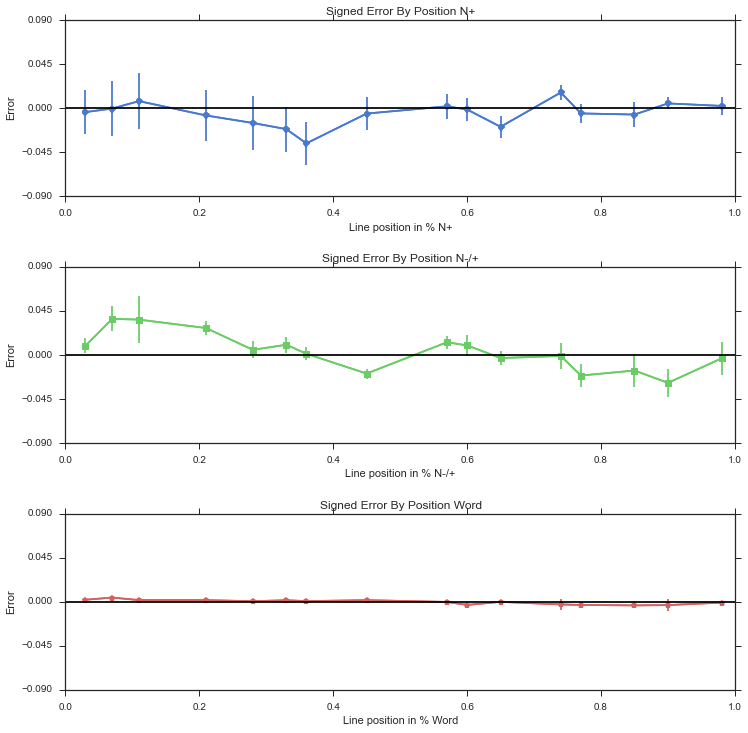

In [250]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, signerror_1_med, 'o-', color=pal[0])
fig1.errorbar(xvals, signerror_1_med, yerr=SE_signerror_1_med*1.96, color=pal[0])
fig1.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Signed Error By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, signerror_2_med, color=pal[1], marker='s')
fig2.errorbar(xvals, signerror_2_med, yerr=SE_signerror_2_med*1.96, color=pal[1])
fig2.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Signed Error By Position N-/+')
plt.xlabel('Line position in % N-/+', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, signerror_3_med, color=pal[2], marker='p')
fig3.errorbar(xvals, signerror_3_med, yerr=SE_signerror_3_med*1.96, color=pal[2])
fig3.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Signed Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

plt.subplots_adjust(hspace=.4)

## SD calculated as std of each subject and then averaging the individual std

###Only 3 datapoints per position per subject so estimate will have a lot of varriability

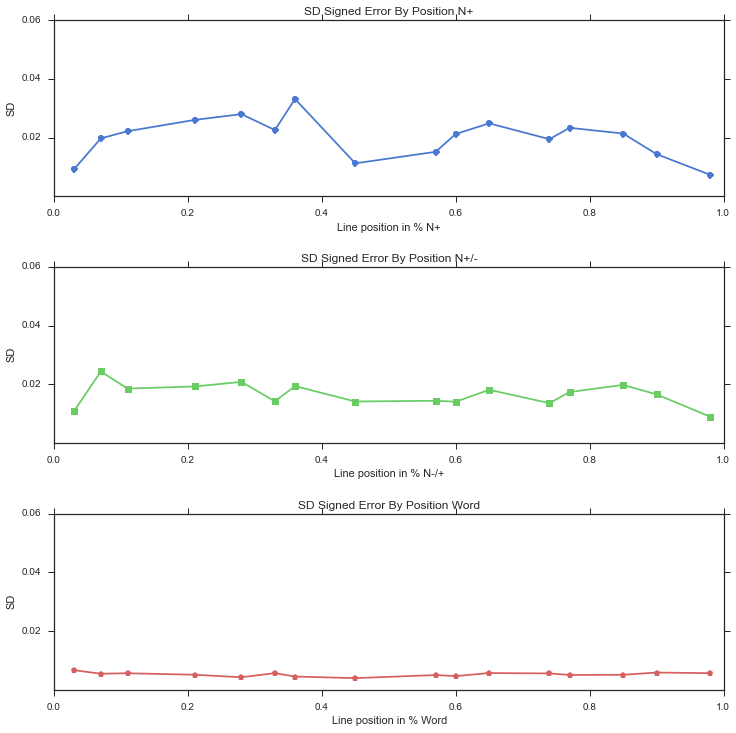

In [255]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, SD_1_med, 'o-', color=pal[0])
plt.title('SD Signed Error By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.05])
plt.yticks(([0.02,0.04,0.06]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, SD_2_med, color=pal[1], marker='s')
plt.title('SD Signed Error By Position N+/-')
plt.xlabel('Line position in % N-/+', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.05])
plt.yticks(([0.02,0.04,0.06]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, SD_3_med, color=pal[2], marker='p')
plt.title('SD Signed Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.05])
plt.yticks(([0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)

##Correlate PAE Vs Landmark Distance

### Distance from 0

In [256]:
dist_0 = xvals
dist_0

array([ 0.03,  0.07,  0.11,  0.21,  0.28,  0.33,  0.36,  0.45,  0.57,
        0.6 ,  0.65,  0.74,  0.77,  0.85,  0.9 ,  0.98])

### Distance from 50

In [257]:
dist_50 = abs(xvals-0.5)
dist_50

array([ 0.47,  0.43,  0.39,  0.29,  0.22,  0.17,  0.14,  0.05,  0.07,
        0.1 ,  0.15,  0.24,  0.27,  0.35,  0.4 ,  0.48])

### Distance from 100

In [258]:
dist_100 = abs(xvals - 1)
dist_100

array([ 0.97,  0.93,  0.89,  0.79,  0.72,  0.67,  0.64,  0.55,  0.43,
        0.4 ,  0.35,  0.26,  0.23,  0.15,  0.1 ,  0.02])

### Distance from Landmark

In [259]:
dist_Land = pd.DataFrame([dist_0, dist_50, dist_100]).min()
dist_Land

0     0.03
1     0.07
2     0.11
3     0.21
4     0.22
5     0.17
6     0.14
7     0.05
8     0.07
9     0.10
10    0.15
11    0.24
12    0.23
13    0.15
14    0.10
15    0.02
dtype: float64

## PAE vs Landmark Distane (across subjects)

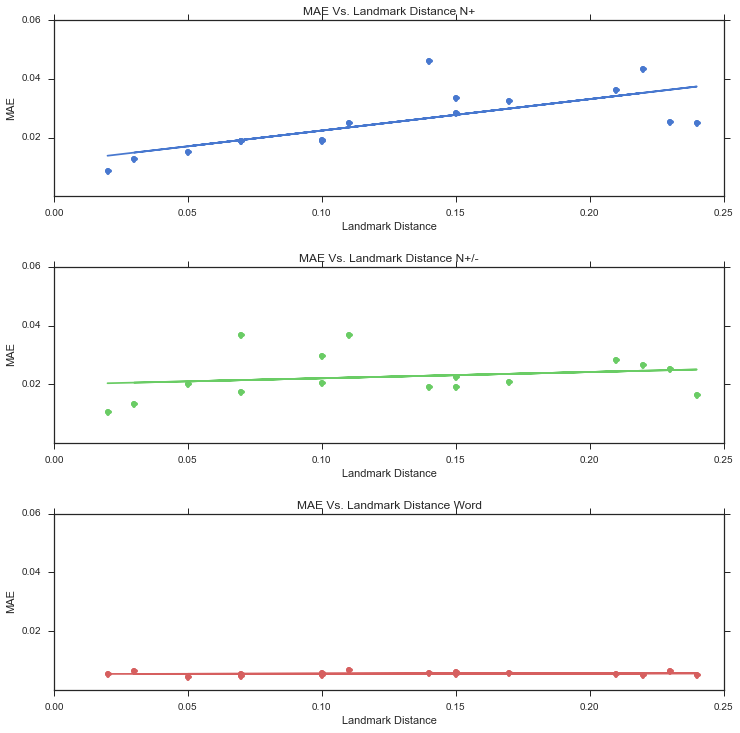

In [260]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(dist_Land,error_1_med,1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land, error_1_med, 'o', color=pal[0])
plt.plot(dist_Land, m1*dist_Land + b1, '-', color=pal[0])
plt.title('MAE Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m2, b2 = np.polyfit(dist_Land,error_2_med,1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land, error_2_med, 'o', color=pal[1])
plt.plot(dist_Land, m2*dist_Land + b2, '-', color=pal[1])
plt.title('MAE Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m3, b3 = np.polyfit(dist_Land,error_3_med,1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land, error_3_med, 'o', color=pal[2])
plt.plot(dist_Land, m3*dist_Land + b3, '-', color=pal[2])
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)

### Slope+,  Slope-,  Slopew

In [261]:
print m1, m2, m3

0.107080562292 0.0212178810348 0.00089741982366


In [262]:
from scipy.stats import linregress
slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,error_1_med)
slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land,error_2_med)
slope3, intercept3, r3, p3, stderr3 = linregress(dist_Land,error_3_med)

### r +,  r -,  r w

In [263]:
print 'r1', r1
print 'r2', r2
print 'r3', r3

r1 0.719620124137
r2 0.20368710182
r3 0.0941346552024


### r^2 +,  r^2 -,  r^2 w

In [264]:
print 'r1sq', r1*r1
print 'r2sq', r2*r2
print 'r3sq', r3*r3

r1sq 0.517853123064
r2sq 0.0414884354477
r3sq 0.00886133331008


In [265]:
#print 'slope1', slope1
#print 'slope2', slope2
#print 'slope3', slope3

In [266]:
print 'p1', p1
print 'p2', p2
print 'p3', p3

p1 0.00167354949159
p2 0.449263203561
p3 0.728767142065


##First half only

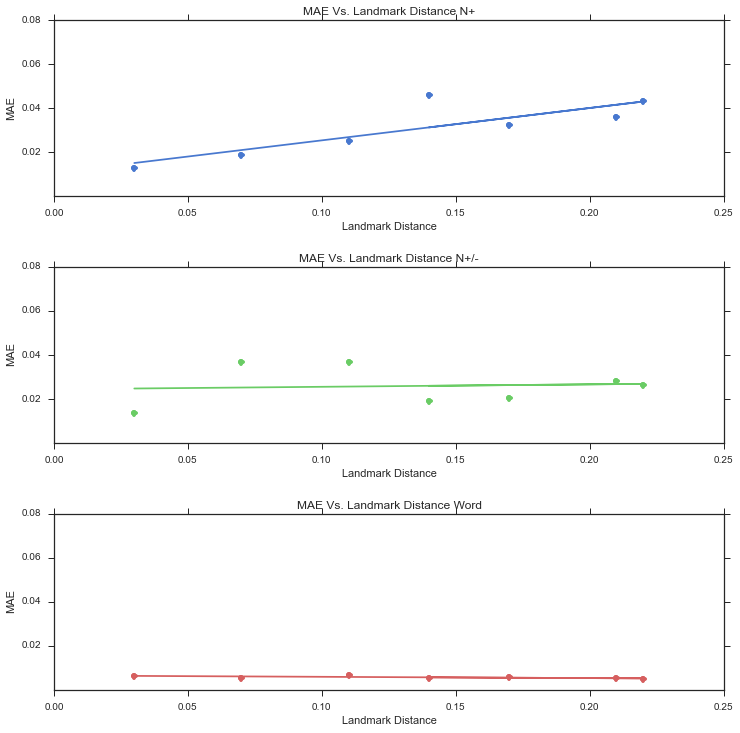

In [267]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(dist_Land[0:7],error_1_med[0:7],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land[0:7], error_1_med[0:7], 'o', color=pal[0])
plt.plot(dist_Land[0:7], m1*dist_Land[0:7] + b1, '-', color=pal[0])
plt.title('MAE Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.08])
plt.yticks(([0.02,0.04,0.06, 0.08]))

m2, b2 = np.polyfit(dist_Land[0:7],error_2_med[0:7],1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land[0:7], error_2_med[0:7], 'o', color=pal[1])
plt.plot(dist_Land[0:7], m2*dist_Land[0:7] + b2, '-', color=pal[1])
plt.title('MAE Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.08])
plt.yticks(([0.02,0.04,0.06,0.08]))

m3, b3 = np.polyfit(dist_Land[0:7],error_3_med[0:7],1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land[0:7], error_3_med[0:7], 'o', color=pal[2])
plt.plot(dist_Land[0:7], m3*dist_Land[0:7] + b3, '-', color=pal[2])
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.08])
plt.yticks(([0.02,0.04,0.06,0.08]))

plt.subplots_adjust(hspace=.4)

##Second half only

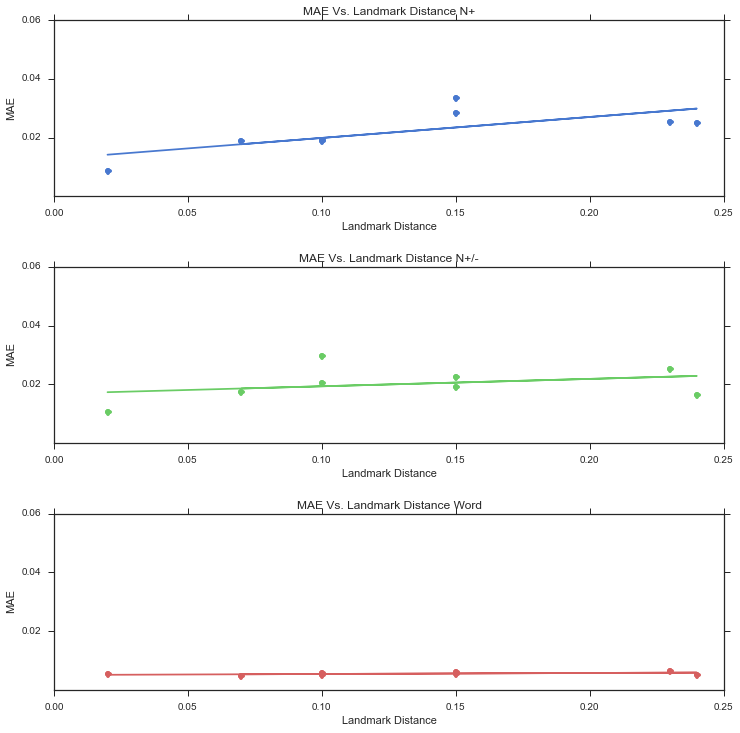

In [268]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(dist_Land[8:],error_1_med[8:],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land[8:], error_1_med[8:], 'o', color=pal[0])
plt.plot(dist_Land[8:], m1*dist_Land[8:] + b1, '-', color=pal[0])
plt.title('MAE Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m2, b2 = np.polyfit(dist_Land[8:],error_2_med[8:],1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land[8:], error_2_med[8:], 'o', color=pal[1])
plt.plot(dist_Land[8:], m2*dist_Land[8:] + b2, '-', color=pal[1])
plt.title('MAE Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m3, b3 = np.polyfit(dist_Land[8:],error_3_med[8:],1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land[8:], error_3_med[8:], 'o', color=pal[2])
plt.plot(dist_Land[8:], m3*dist_Land[8:] + b3, '-', color=pal[2])
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)

## Landmark distance Vs signed error

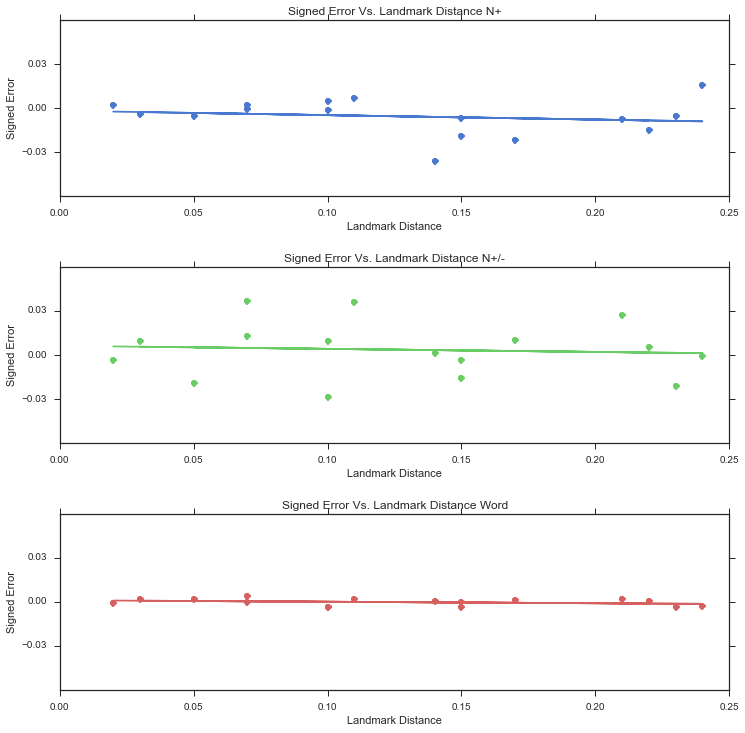

In [269]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(dist_Land,signerror_1_med,1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land, signerror_1_med, 'o', color=pal[0])
plt.plot(dist_Land, m1*dist_Land + b1, '-', color=pal[0])
plt.title('Signed Error Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('Signed Error')
plt.ylim([-0.06,0.06])
plt.yticks(([-0.03,0.,0.03]))

m2, b2 = np.polyfit(dist_Land,signerror_2_med,1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land, signerror_2_med, 'o', color=pal[1])
plt.plot(dist_Land, m2*dist_Land + b2, '-', color=pal[1])
plt.title('Signed Error Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('Signed Error')
plt.ylim([-0.06,0.06])
plt.yticks(([-0.03,0.,0.03]))

m3, b3 = np.polyfit(dist_Land,signerror_3_med,1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land, signerror_3_med, 'o', color=pal[2])
plt.plot(dist_Land, m3*dist_Land + b3, '-', color=pal[2])
plt.title('Signed Error Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('Signed Error')
plt.ylim([-0.06,0.06])
plt.yticks(([-0.03,0.,0.03]))

plt.subplots_adjust(hspace=.4)

## Estimation slope vs SAT scores

In [270]:
del nline_df['MouseTrack']

In [271]:
nline_df.to_csv('nline_data.csv', sep='\t')

In [272]:
new_df = pd.read_csv('nline_data.csv',sep='\t')

In [273]:
len(new_df)

7104

In [274]:
new_df.loc[:,:]= new_df[new_df['catch']<1]
#len(nline_miss)
new_df['Missed'] = new_df['Error']
new_df.loc[new_df['Missed']<1,'Missed'] = 0
#Pick only responded trials
new_df.loc[:,:] = new_df[new_df['Missed']==0]

In [275]:
new_df = new_df[pd.notnull(new_df['Subject'])]

In [276]:
new_df['AbsError'] = np.abs(new_df['Error'])

In [277]:
new_df['BigError'] = 0
new_df.loc[new_df['AbsError']>0.15,'BigError'] = 1
new_df['BigError'].sum()

87

In [278]:
group_task = new_df.groupby(['Subject','Task','Line_pct'])

In [279]:
#group_task.groups

In [280]:
#group_task.get_group(('s_02003',1,0.98))['Error'].mean()

In [281]:
error = group_task['Error'].mean()
response = group_task['Response'].mean()

In [292]:
response.loc['s_04203'].loc[1]

Line_pct
0.03    0.080853
0.07    0.067174
0.11    0.094584
0.21    0.202661
0.28    0.278293
0.33    0.291487
0.36    0.316725
0.45    0.431972
0.57    0.601719
0.60    0.633318
0.65    0.657497
0.74    0.754417
0.77    0.777140
0.85    0.837365
0.90    0.891962
0.98    0.969941
Name: Response, dtype: float64

In [293]:
response.loc['s_04203'].loc[1].index

Float64Index([0.03, 0.07, 0.11, 0.21, 0.28, 0.33, 0.36, 0.45, 0.57,  0.6, 0.65,
              0.74, 0.77, 0.85,  0.9, 0.98],
             dtype='float64', name=u'Line_pct')

In [284]:
subjs = new_df['Subject'].unique()
tasks = new_df['Task'].unique()

In [285]:
tasks

array([ 3.,  1.,  2.])

In [294]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0
error_dict = {}
position_dict = {}
results_list = []
for s in subjs:
    error_dict[s] = {}
    position_dict[s] = {}
    for t in tasks:
        d_tmp = {}
        error_dict[s][t] = error.loc[s].loc[t]
        position_dict[s][t] = response.loc[s].loc[t]
        slope,inter,r,p,stderr = linregress(error_dict[s][t].index, error_dict[s][t])
        slope2,inter2,r2,p2,stderr2 = linregress(position_dict[s][t].index, position_dict[s][t])
        d_tmp = {'Subject':s, 'Task':t, 'slope_E':slope, 'slope_P':slope2, 'int_E':inter,
                 'int_P':inter2,'r_E':r, 'r_P':r2, 'p_E':p, 'p_P':p2, 'stderr_E':stderr,
                 'stderr_P':stderr2, 'R2_E':r*r, 'R2_P':r2*r2}
        results_list.append(d_tmp)
res_df = pd.DataFrame(results_list)      

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:1323: FutureWarning: scalar indexers for index type MultiIndex should be integers and not floating point
  key = self._convert_scalar_indexer(key, axis)


## Histogram slope subject estimates Task +

(0, 18)

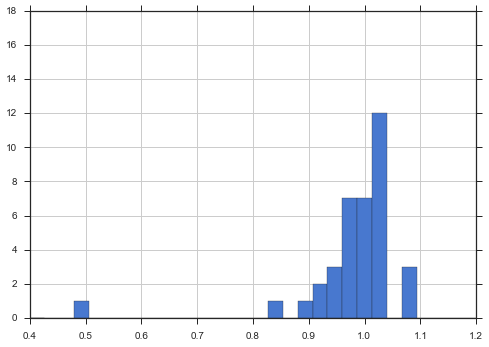

In [295]:
res_df['slope_P'][res_df['Task']==1].hist(bins=30, range=[0.4,1.2])
plt.ylim([0,18])

##From above (in the missing trial analysis)
S_04116 seems to have not understood the word task ** Also slope of estimates for N+ (see way below) is 0.4 really far off from a slope close to 1 li the rest of subjects
S_04208 has highest misses of my batch and also has a 0,48 slope(see way below)
S_04117 has 37 missed trials and also has 0.78 slope (see way below)
S_04104 has 37 missed trials but slope in normal range

## Histogram slope subject estimates Task -

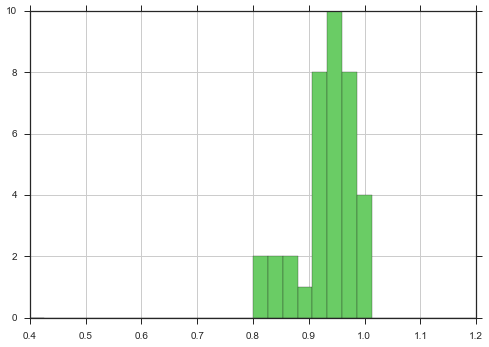

In [299]:
res_df['slope_P'][res_df['Task']==2].hist(bins=30, range=[0.4,1.2],color=pal[1])

## Histogram slope subject estimates Task w

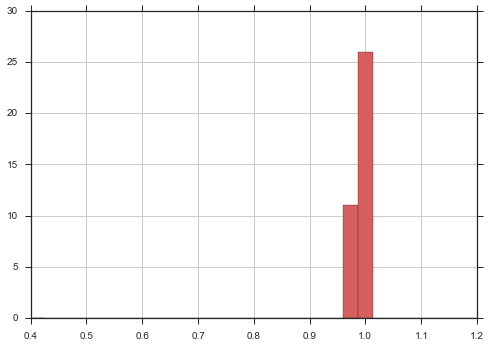

In [300]:
res_df['slope_P'][res_df['Task']==3].hist(bins=30, range=[0.4,1.2],color=pal[2])

In [301]:
math = pd.read_csv('MathScores.csv')

In [302]:
res_df = pd.merge(res_df,math,on='Subject',how='inner')

In [303]:
#res_df[['Subject','slope_P', 'Math_Score']][res_df['Task']==1]

In [304]:
#slope1, intercept1, r1, p1, stderr1 = linregress(abs(res_df['slope_E'][res_df['Task']==1]),
#                                                 res_df['Math_Score'][res_df['Task']==1])
#plt.plot(abs(res_df['slope_E'][res_df['Task']==1]),res_df['Math_Score'][res_df['Task']==1], 'o')
#plt.plot(abs(res_df['slope_E'][res_df['Task']==1]), slope1*abs(res_df['slope_E'][res_df['Task']==1]) + intercept1, 'b-')

In [305]:
#print r1, r1*r1, p

##  Deviation from Linearity Vs. Math Score

### Including s_04208

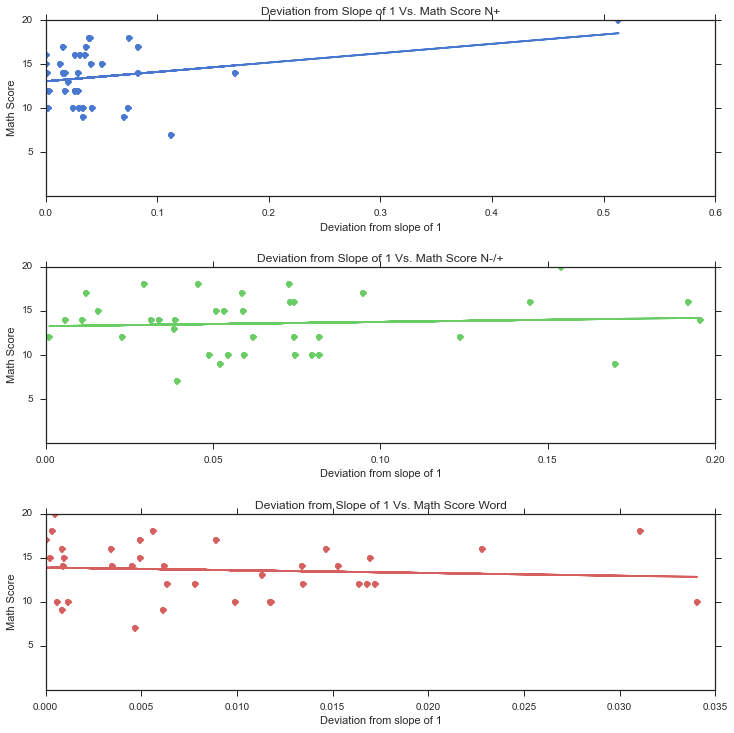

In [310]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==1] -1),
                    res_df['Math_Score'][res_df['Task']==1],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(abs(res_df['slope_P'][res_df['Task']==1] -1),
          res_df['Math_Score'][res_df['Task']==1], 'o', color=pal[0])
plt.plot(abs(res_df['slope_P'][res_df['Task']==1] -1), 
         m1*abs(res_df['slope_P'][res_df['Task']==1] -1) + b1, '-', color=pal[0])
plt.title('Deviation from Slope of 1 Vs. Math Score N+')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m2, b2 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==2] -1),
                    res_df['Math_Score'][res_df['Task']==2],1)
#fig = plt.figure(figsize=(12,12))
fig2 = plt.subplot(3,1,2)
fig2.plot(abs(res_df['slope_P'][res_df['Task']==2] -1),
          res_df['Math_Score'][res_df['Task']==2], 'o', color=pal[1])
plt.plot(abs(res_df['slope_P'][res_df['Task']==2] -1), 
         m2*abs(res_df['slope_P'][res_df['Task']==2] -1) + b2, '-', color=pal[1])
plt.title('Deviation from Slope of 1 Vs. Math Score N-/+')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

#handle nan
idx = np.isfinite(abs(res_df['slope_P'][res_df['Task']==3] -1)) & np.isfinite(res_df['Math_Score'][res_df['Task']==3])
m3, b3 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==3][idx] -1),
                    res_df['Math_Score'][res_df['Task']==3][idx],1)
#fig = plt.figure(figsize=(12,12))
fig3 = plt.subplot(3,1,3)
fig3.plot(abs(res_df['slope_P'][res_df['Task']==3] -1),
          res_df['Math_Score'][res_df['Task']==3], 'o', color=pal[2])
plt.plot(abs(res_df['slope_P'][res_df['Task']==3] -1), 
         m3*abs(res_df['slope_P'][res_df['Task']==3] -1) + b3, '-', color=pal[2])
plt.title('Deviation from Slope of 1 Vs. Math Score Word')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))
plt.subplots_adjust(hspace=.4)

In [311]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [312]:
slope1, intercept1, r1, p1, stderr1 = linregress(abs(res_df['slope_P'][res_df['Task']==1]-1),
                                                 res_df['Math_Score'][res_df['Task']==1])
slope2, intercept2, r2, p2, stderr2 = linregress(abs(res_df['slope_P'][res_df['Task']==2]-1),
                                                 res_df['Math_Score'][res_df['Task']==2])
slope3, intercept3, r3, p3, stderr3 = linregress(abs(res_df['slope_P'][res_df['Task']==3]-1),
                                                 res_df['Math_Score'][res_df['Task']==3])

### r +, r -, r w

In [313]:
print r1, r2, r3

0.293259284604 0.0772663142007 -0.0841074552221


### R^2 +, R^2 -, R^2 w

In [314]:
print r1*r1, r2*r2, r3*r3

0.0860010080066 0.00597008331016 0.00707406402394


### Slope +, Slope -, Slope w

In [315]:
print slope1, slope2, slope3

10.6234666525 4.84056946093 -30.9128569299


### p-value +, p-value -, p-value w

In [316]:
print p1, p2, p3

0.0781432239704 0.64943884558 0.620653358196


## Slope Vs Intercept

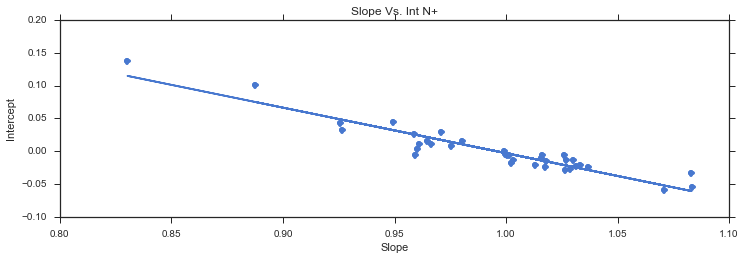

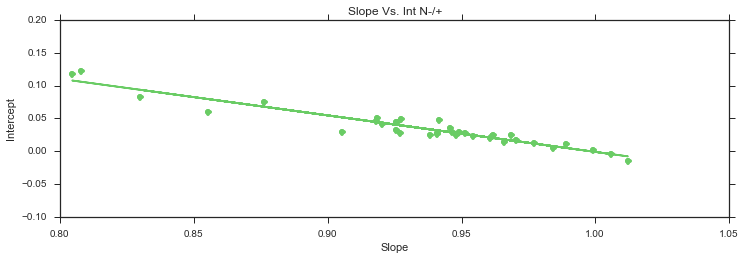

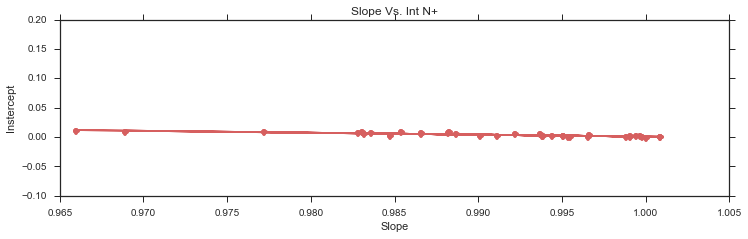

In [335]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(res_df['slope_P'][res_df['Task']==1],
                    res_df['int_P'][res_df['Task']==1],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(res_df['slope_P'][res_df['Task']==1],
          res_df['int_P'][res_df['Task']==1], 'o', color=pal[0])
plt.plot(res_df['slope_P'][res_df['Task']==1], 
         m1*res_df['slope_P'][res_df['Task']==1] + b1, '-', color=pal[0])
plt.title('Slope Vs. Int N+')
plt.xlabel('Slope', labelpad = 4)
plt.ylabel('Intercept')
plt.ylim([-0.1,0.2])
plt.yticks(([-0.1,-0.05,0,.05,.1,.15,0.2]))

m2, b2 = np.polyfit(res_df['slope_P'][res_df['Task']==2],
                    res_df['int_P'][res_df['Task']==2],1)
fig = plt.figure(figsize=(12,12))
fig2 = plt.subplot(3,1,2)
fig2.plot(res_df['slope_P'][res_df['Task']==2],
          res_df['int_P'][res_df['Task']==2], 'o', color=pal[1])
plt.plot(res_df['slope_P'][res_df['Task']==2], 
         m2*res_df['slope_P'][res_df['Task']==2] + b2, '-', color=pal[1])
plt.title('Slope Vs. Int N-/+')
plt.xlabel('Slope', labelpad = 4)
plt.ylabel('Intercept')
plt.ylim([-0.1,0.2])
plt.yticks(([-0.1,-0.05,0,.05,.1,.15,0.2]))


m3, b3 = np.polyfit(res_df['slope_P'][res_df['Task']==3],
                    res_df['int_P'][res_df['Task']==3],1)
fig = plt.figure(figsize=(12,12))
fig3 = plt.subplot(3,1,3)
fig3.plot(res_df['slope_P'][res_df['Task']==3],
          res_df['int_P'][res_df['Task']==3], 'o', color=pal[2])
plt.plot(res_df['slope_P'][res_df['Task']==3], 
         m3*res_df['slope_P'][res_df['Task']==3] + b3, '-', color=pal[2])
plt.title('Slope Vs. Int N+')
plt.xlabel('Slope', labelpad = 4)
plt.ylabel('Instercept')
plt.ylim([-0.1,0.2])
plt.yticks(([-0.1,-0.05,0,.05,.1,.15,0.2]))
plt.subplots_adjust(hspace=.4)

## Remove s_04208

In [317]:
res_df.loc[:,:] = res_df[res_df['Subject']!='s_04208']

In [318]:
res_df.Subject.unique()

array(['s_04203', 's_04202', 's_04201', 's_04207', 's_04206', 's_04205',
       's_04204', 's_04209', nan, 's_04212', 's_04119', 's_04118',
       's_04113', 's_04112', 's_04111', 's_04110', 's_04115', 's_04114',
       's_04210', 's_04211', 's_04120', 's_04213', 's_04214', 's_04215',
       's_04216', 's_04217', 's_04218', 's_04219', 's_04220', 's_04108',
       's_04109', 's_04101', 's_04102', 's_04103', 's_04105', 's_04106',
       's_04107'], dtype=object)

In [319]:
res_df= res_df[pd.notnull(res_df['Subject'])]

In [320]:
res_df.Subject.unique()

array(['s_04203', 's_04202', 's_04201', 's_04207', 's_04206', 's_04205',
       's_04204', 's_04209', 's_04212', 's_04119', 's_04118', 's_04113',
       's_04112', 's_04111', 's_04110', 's_04115', 's_04114', 's_04210',
       's_04211', 's_04120', 's_04213', 's_04214', 's_04215', 's_04216',
       's_04217', 's_04218', 's_04219', 's_04220', 's_04108', 's_04109',
       's_04101', 's_04102', 's_04103', 's_04105', 's_04106', 's_04107'], dtype=object)

In [321]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [322]:
slope1, intercept1, r1, p1, stderr1 = linregress(abs(res_df['slope_P'][res_df['Task']==1]-1),
                                                 res_df['Math_Score'][res_df['Task']==1])
slope2, intercept2, r2, p2, stderr2 = linregress(abs(res_df['slope_P'][res_df['Task']==2]-1),
                                                 res_df['Math_Score'][res_df['Task']==2])
slope3, intercept3, r3, p3, stderr3 = linregress(abs(res_df['slope_P'][res_df['Task']==3]-1),
                                                 res_df['Math_Score'][res_df['Task']==3])

In [323]:
print r1, r2, r3

-0.0715037960118 -0.028543311676 -0.0270639990516


In [324]:
print r1*r1, r2*r2, r3*r3

0.0051127928441 0.000814720641433 0.000732460044667


In [325]:
print slope1, slope2, slope3

-6.03896480583 -1.75281323536 -9.45535641077


In [326]:
print p1, p2, p3

0.678571677774 0.868747758273 0.875495704776


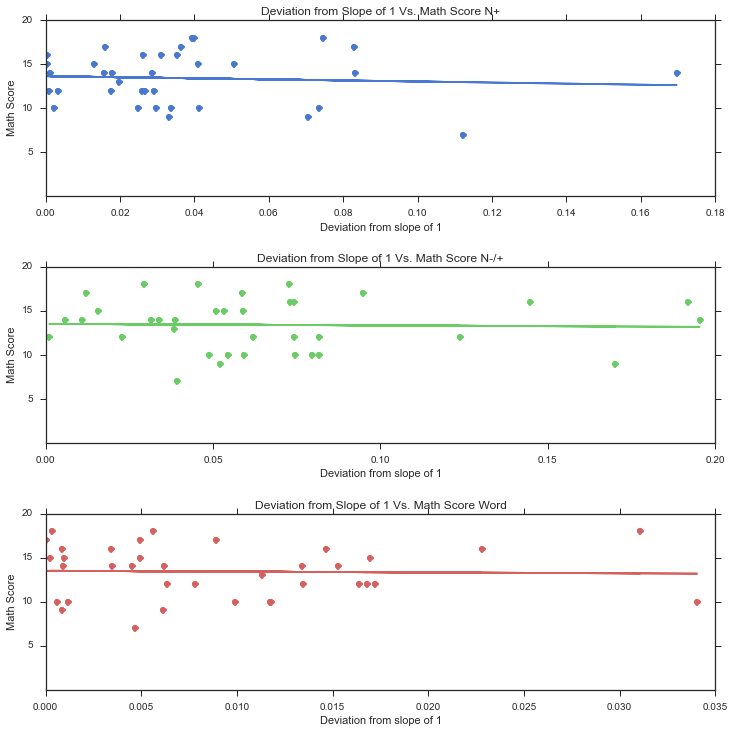

In [327]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==1] -1),
                    res_df['Math_Score'][res_df['Task']==1],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(abs(res_df['slope_P'][res_df['Task']==1] -1),
          res_df['Math_Score'][res_df['Task']==1], 'o', color=pal[0])
plt.plot(abs(res_df['slope_P'][res_df['Task']==1] -1), 
         m1*abs(res_df['slope_P'][res_df['Task']==1] -1) + b1, '-', color=pal[0])
plt.title('Deviation from Slope of 1 Vs. Math Score N+')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m2, b2 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==2] -1),
                    res_df['Math_Score'][res_df['Task']==2],1)
#fig = plt.figure(figsize=(12,12))
fig2 = plt.subplot(3,1,2)
fig2.plot(abs(res_df['slope_P'][res_df['Task']==2] -1),
          res_df['Math_Score'][res_df['Task']==2], 'o', color=pal[1])
plt.plot(abs(res_df['slope_P'][res_df['Task']==2] -1), 
         m2*abs(res_df['slope_P'][res_df['Task']==2] -1) + b2, '-', color=pal[1])
plt.title('Deviation from Slope of 1 Vs. Math Score N-/+')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

#handle nan
idx = np.isfinite(abs(res_df['slope_P'][res_df['Task']==3] -1)) & np.isfinite(res_df['Math_Score'][res_df['Task']==3])
m3, b3 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==3][idx] -1),
                    res_df['Math_Score'][res_df['Task']==3][idx],1)
#fig = plt.figure(figsize=(12,12))
fig3 = plt.subplot(3,1,3)
fig3.plot(abs(res_df['slope_P'][res_df['Task']==3] -1),
          res_df['Math_Score'][res_df['Task']==3], 'o', color=pal[2])
plt.plot(abs(res_df['slope_P'][res_df['Task']==3] -1), 
         m3*abs(res_df['slope_P'][res_df['Task']==3] -1) + b3, '-', color=pal[2])
plt.title('Deviation from Slope of 1 Vs. Math Score Word')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))
plt.subplots_adjust(hspace=.4)

## Slope Vs Intercept

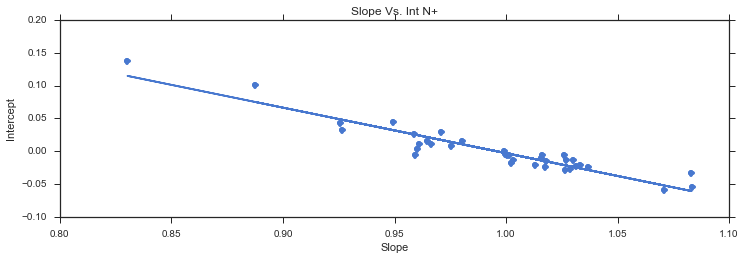

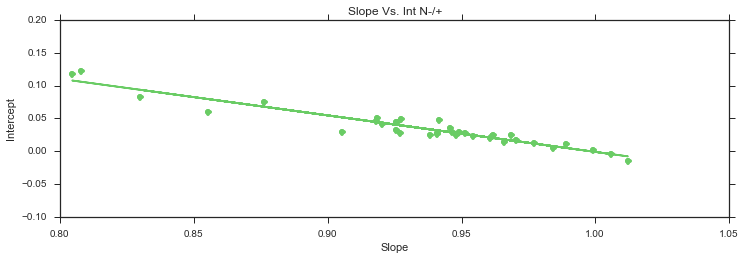

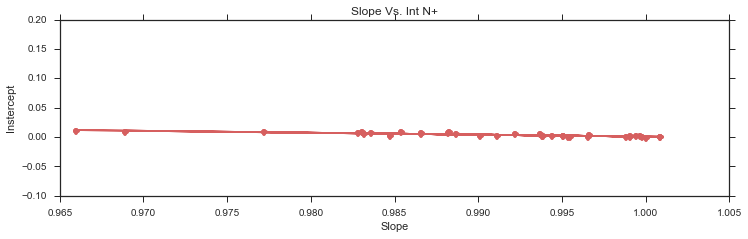

In [336]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(res_df['slope_P'][res_df['Task']==1],
                    res_df['int_P'][res_df['Task']==1],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(res_df['slope_P'][res_df['Task']==1],
          res_df['int_P'][res_df['Task']==1], 'o', color=pal[0])
plt.plot(res_df['slope_P'][res_df['Task']==1], 
         m1*res_df['slope_P'][res_df['Task']==1] + b1, '-', color=pal[0])
plt.title('Slope Vs. Int N+')
plt.xlabel('Slope', labelpad = 4)
plt.ylabel('Intercept')
plt.ylim([-0.1,0.2])
plt.yticks(([-0.1,-0.05,0,.05,.1,.15,0.2]))

m2, b2 = np.polyfit(res_df['slope_P'][res_df['Task']==2],
                    res_df['int_P'][res_df['Task']==2],1)
fig = plt.figure(figsize=(12,12))
fig2 = plt.subplot(3,1,2)
fig2.plot(res_df['slope_P'][res_df['Task']==2],
          res_df['int_P'][res_df['Task']==2], 'o', color=pal[1])
plt.plot(res_df['slope_P'][res_df['Task']==2], 
         m2*res_df['slope_P'][res_df['Task']==2] + b2, '-', color=pal[1])
plt.title('Slope Vs. Int N-/+')
plt.xlabel('Slope', labelpad = 4)
plt.ylabel('Intercept')
plt.ylim([-0.1,0.2])
plt.yticks(([-0.1,-0.05,0,.05,.1,.15,0.2]))


m3, b3 = np.polyfit(res_df['slope_P'][res_df['Task']==3],
                    res_df['int_P'][res_df['Task']==3],1)
fig = plt.figure(figsize=(12,12))
fig3 = plt.subplot(3,1,3)
fig3.plot(res_df['slope_P'][res_df['Task']==3],
          res_df['int_P'][res_df['Task']==3], 'o', color=pal[2])
plt.plot(res_df['slope_P'][res_df['Task']==3], 
         m3*res_df['slope_P'][res_df['Task']==3] + b3, '-', color=pal[2])
plt.title('Slope Vs. Int N+')
plt.xlabel('Slope', labelpad = 4)
plt.ylabel('Instercept')
plt.ylim([-0.1,0.2])
plt.yticks(([-0.1,-0.05,0,.05,.1,.15,0.2]))
plt.subplots_adjust(hspace=.4)

##Scatter plots for individual subjects

In [337]:
new_math_df = pd.merge(new_df,math,on='Subject',how='inner')

In [338]:
ordered = res_df[['Subject', 'Math_Score']][res_df['Task']==1]
ordered_math = ordered.sort_values(by='Math_Score', ascending=False)

In [339]:
table_order = ordered_math.Subject

In [340]:
#sns.set_palette('muted')
#sns.set_style('ticks')
#g = sns.FacetGrid(new_math_df[new_math_df['Task']==1], col='Subject', col_wrap=3, xlim=(0,1),
#                  ylim=(0,1), col_order=ordered_math['Subject'], size=4, aspect=1.2)
#g = g.map(sns.regplot, 'Line_pct', 'Response', scatter_kws={'s':80, 'marker':'+'})
#ctr = 0
#for ax in g.axes.flat:
#    ax.set_title(ordered_math.iloc[ctr]['Math_Score'])
#    ctr = ctr + 1

# Task N+

# How to add a figure title to the whole figure?
# How to format the small titles with smart code that has the subj id plus the SAT score, and some constant string from me

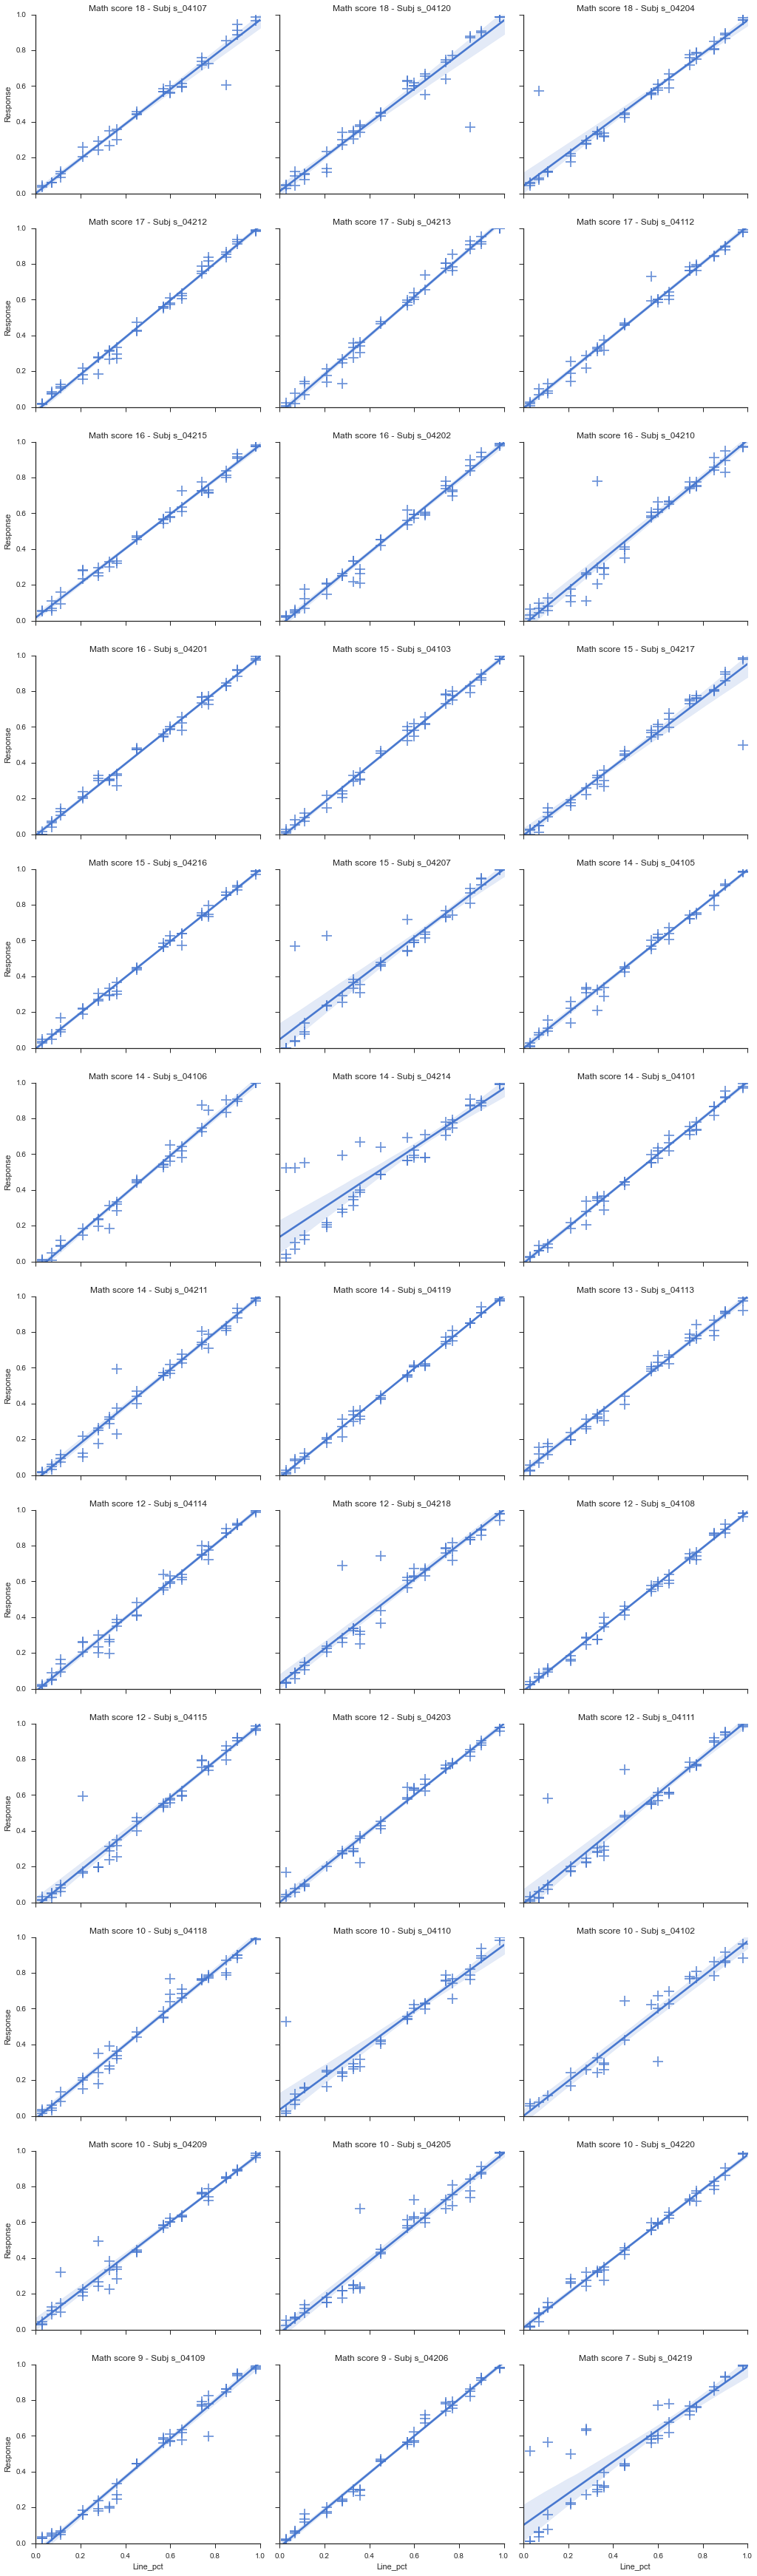

In [341]:
#sns.set_palette('BuGn_r')
g = sns.lmplot(x='Line_pct', y='Response', col='Subject',col_wrap=3,
           data=new_math_df[new_math_df['Task']==1],markers=['+'],
               col_order=ordered_math['Subject'],
               size=4,aspect=1.2,scatter_kws={'s':200, 'color':pal[0]},
              line_kws={'color':pal[0]})
g = (g.set(xlim=(0,1),ylim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1
g.savefig('Scatter_Positive.png')

# Task N-/+

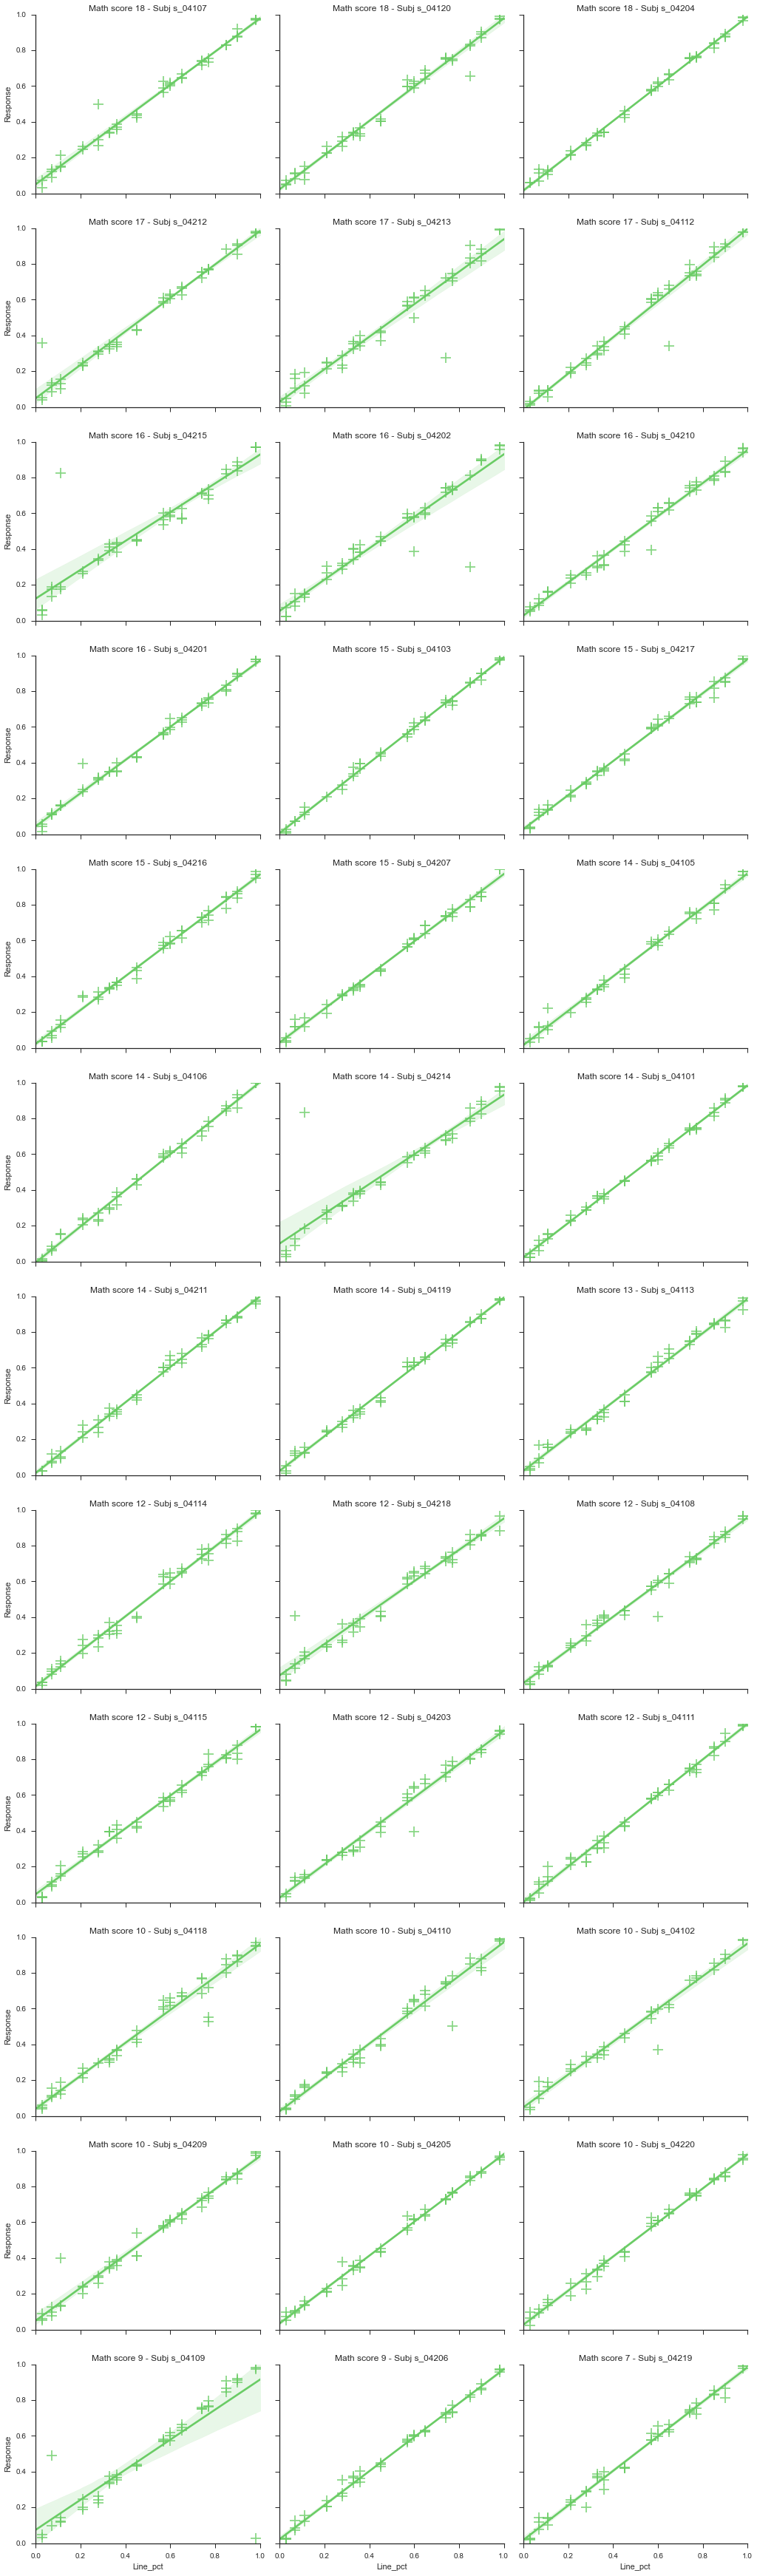

In [349]:
#sns.set_palette('muted')
g = sns.lmplot(x='Line_pct', y='Response', col='Subject',col_wrap=3,
           data=new_math_df[new_math_df['Task']==2],
               markers=['+'],col_order=ordered_math['Subject'],
               size=4,aspect=1.2,scatter_kws={'s':200,'color':pal[1]},
              line_kws={'color':pal[1]})
g = (g.set(xlim=(0,1),ylim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1
g.savefig('Scatter_Negative.png')

## Make Result Table

In [350]:
group_task_t = new_df.groupby(['Subject', 'Task'])
#group_task_t['BigError'].sum()

In [351]:
results_df = pd.DataFrame(new_df[new_df['Task']==1].groupby('Subject')['RT'].mean())
results_df.columns = ['RT+']
results_df['RT-'] = new_df[new_df['Task']==2].groupby('Subject')['RT'].mean()
results_df['RTw'] = new_df[new_df['Task']==3].groupby('Subject')['RT'].mean()

In [352]:
results_df['E+'] = new_df[new_df['Task']==1].groupby('Subject')['BigError'].sum()
results_df['E-'] = new_df[new_df['Task']==2].groupby('Subject')['BigError'].sum()
results_df['Ew'] = new_df[new_df['Task']==3].groupby('Subject')['BigError'].sum()

In [353]:
sds = []
for sub in responded.groupby(level=0).groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        sds.append({'Subject':sub, 'Task':task, 'Line_pct':stim,
             'SD':position_tasks.get_group((task,stim)).loc[sub]['Error'].std()})
SD_df = pd.DataFrame(sds)
results_df['SD+'] = SD_df[SD_df['Task']==1].groupby('Subject')['SD'].mean()
results_df['SD-'] = SD_df[SD_df['Task']==2].groupby('Subject')['SD'].mean()
results_df['SDw'] = SD_df[SD_df['Task']==3].groupby('Subject')['SD'].mean()

In [354]:
r2_1 = res_df[['Subject','R2_P']][res_df['Task']==1]
r2_1.columns = ['Subject', 'R^2+']
results_df = results_df.join(r2_1.groupby('Subject').mean(), how='inner')

In [355]:
r2_2 = res_df[['Subject','R2_P']][res_df['Task']==2]
r2_2.columns = ['Subject', 'R^2-']
results_df = results_df.join(r2_2.groupby('Subject').mean(), how='inner')

In [356]:
r2_3 = res_df[['Subject','R2_P']][res_df['Task']==3]
r2_3.columns = ['Subject', 'R^2w']
results_df = results_df.join(r2_3.groupby('Subject').mean(), how='inner')

In [357]:
slope_1 = res_df[['Subject','slope_P']][res_df['Task']==1]
slope_1.columns = ['Subject', 'slope+']
results_df = results_df.join(slope_1.groupby('Subject').mean(), how='inner')
slope_2 = res_df[['Subject','slope_P']][res_df['Task']==2]
slope_2.columns = ['Subject', 'slope-']
results_df = results_df.join(slope_2.groupby('Subject').mean(), how='inner')
slope_3 = res_df[['Subject','slope_P']][res_df['Task']==3]
slope_3.columns = ['Subject', 'slopew']
results_df = results_df.join(slope_3.groupby('Subject').mean(), how='inner')

In [358]:
PAE1 = new_df[new_df['Task']==1].groupby(['Subject', 'Line_pct'])['AbsError'].mean()
PAE2 = new_df[new_df['Task']==2].groupby(['Subject', 'Line_pct'])['AbsError'].mean()
PAE3 = new_df[new_df['Task']==3].groupby(['Subject', 'Line_pct'])['AbsError'].mean()

In [359]:
#PAE1.loc['s_02003'].iloc[0:8]

In [360]:
corrs1 = []
for sub in PAE1.index.levels[0]:
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land[0:8],PAE1.loc[sub].iloc[0:8])
    slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land[8:],PAE1.loc[sub].iloc[8:])
    corrs1.append({'Subject':sub, 'DE_l_+':r1, 'DE_r_+':r2})
DE1 = pd.DataFrame(corrs1)
results_df = results_df.join(DE1.groupby('Subject').mean(), how='inner')

In [361]:
corrs2 = []
for sub in PAE2.index.levels[0]:
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land[0:8],PAE2.loc[sub].iloc[0:8])
    slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land[8:],PAE2.loc[sub].iloc[8:])
    corrs2.append({'Subject':sub, 'DE_l_-':r1, 'DE_r_-':r2})
DE2 = pd.DataFrame(corrs2)
results_df = results_df.join(DE2.groupby('Subject').mean(), how='inner')

In [362]:
corrs3 = []
for sub in PAE3.index.levels[0]:
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land[0:8],PAE3.loc[sub].iloc[0:8])
    slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land[8:],PAE3.loc[sub].iloc[8:])
    corrs3.append({'Subject':sub, 'DE_l_w':r1, 'DE_r_w':r2})
DE3 = pd.DataFrame(corrs3)
results_df = results_df.join(DE3.groupby('Subject').mean(), how='inner')

In [363]:
miss_df = pd.read_csv('nline_data.csv',sep='\t')
miss_df.loc[:,:]= miss_df[miss_df['catch']<1]
#len(nline_miss)
miss_df['Missed'] = miss_df['Error']
miss_df.loc[miss_df['Missed']<1,'Missed'] = 0
miss_df = miss_df[pd.notnull(miss_df['Subject'])]

In [364]:
results_df['Miss+'] = miss_df[miss_df['Task']==1].groupby('Subject')['Missed'].sum()
results_df['Miss-'] = miss_df[miss_df['Task']==2].groupby('Subject')['Missed'].sum()
results_df['Missw'] =miss3 = miss_df[miss_df['Task']==3].groupby('Subject')['Missed'].sum()

In [365]:
math.columns = ['Subject', 'SAT']
results_df = results_df.join(math.groupby('Subject').mean(), how='inner')

In [366]:
cols = results_df.columns.tolist()
cols = cols[-1:] + cols[-4:-1] + cols[0:-4]
results_df = results_df[cols]

In [367]:
results_df['AbsError+'] = new_df[new_df['Task']==1].groupby('Subject')['AbsError'].mean()
results_df['AbsError-'] = new_df[new_df['Task']==2].groupby('Subject')['AbsError'].mean()
results_df['AbsErrorw'] = new_df[new_df['Task']==3].groupby('Subject')['AbsError'].mean()

In [368]:
linear_1 = res_df[['Subject','slope_P']][res_df['Task']==1]
linear_1.loc[:,'slope_P'] = abs(linear_1['slope_P'] - 1)
linear_1.columns = ['Subject', 'linearity+']
results_df = results_df.join(linear_1.groupby('Subject').mean(), how='inner')
linear_2 = res_df[['Subject','slope_P']][res_df['Task']==2]
linear_2.loc[:,'slope_P'] = abs(linear_2['slope_P'] - 1)
linear_2.columns = ['Subject', 'linearity-']
results_df = results_df.join(linear_2.groupby('Subject').mean(), how='inner')
linear_3 = res_df[['Subject','slope_P']][res_df['Task']==3]
linear_3.loc[:,'slope_P'] = abs(linear_3['slope_P'] - 1)
linear_3.columns = ['Subject', 'linearityw']
results_df = results_df.join(linear_3.groupby('Subject').mean(), how='inner')

In [369]:
results_df = results_df.loc[table_order]
results_df

,SAT,Miss+,Miss-,Missw,RT+,RT-,RTw,E+,E-,Ew,...,DE_l_-,DE_r_-,DE_l_w,DE_r_w,AbsError+,AbsError-,AbsErrorw,linearity+,linearity-,linearityw
Subject,,,,,,,,,,,,,,,,,,,,,
s_04107,18,10,5,0,2.206240,2.355675,2.205304,1,1,0,...,0.445396,0.135220,0.071389,-0.761628,0.026358,0.026662,0.006674,0.039849,0.072630,0.000326
s_04120,18,3,1,5,1.939636,1.993921,1.966501,1,1,0,...,-0.573868,0.110570,0.052228,0.140662,0.033907,0.027289,0.006165,0.039247,0.045538,0.005610
s_04204,18,0,1,3,2.030239,1.971791,2.178898,1,0,1,...,-0.708485,0.247393,-0.769831,-0.143819,0.027651,0.015146,0.009548,0.074504,0.029493,0.031093
s_04212,17,0,3,0,2.264475,2.218658,1.942220,0,1,0,...,-0.569983,-0.065483,0.006194,0.363581,0.023404,0.026418,0.004560,0.036484,0.058574,0.000026
s_04213,17,3,3,3,2.145873,2.178027,2.056509,1,1,0,...,-0.248375,0.651402,-0.658992,0.019059,0.033501,0.043157,0.005674,0.082782,0.094673,0.004939
s_04112,17,5,2,1,2.178980,2.102155,2.036174,1,1,0,...,0.581994,0.224319,-0.657559,0.113386,0.022186,0.027536,0.004992,0.015945,0.012152,0.008891
s_04215,16,4,4,6,2.261824,2.217628,2.186071,0,1,0,...,0.078262,0.602543,0.320962,0.157302,0.025900,0.058786,0.006099,0.035440,0.191970,0.014640
s_04202,16,1,1,1,1.942542,1.927917,1.933792,0,2,0,...,0.586591,0.095689,-0.427279,0.165306,0.031074,0.042594,0.003773,0.026225,0.144659,0.003402
s_04210,16,1,1,3,2.004338,1.976409,2.101982,2,1,0,...,-0.473832,-0.463174,-0.244858,-0.286272,0.045357,0.033073,0.006433,0.031164,0.072951,0.000877


In [370]:
results_df.to_excel('Results Table.xlsx', index_label='Subject', merge_cells=False)

##  PAE Vs. Math Score

([<matplotlib.axis.YTick at 0x11a455850>,
 <a list of 4 Text yticklabel objects>)

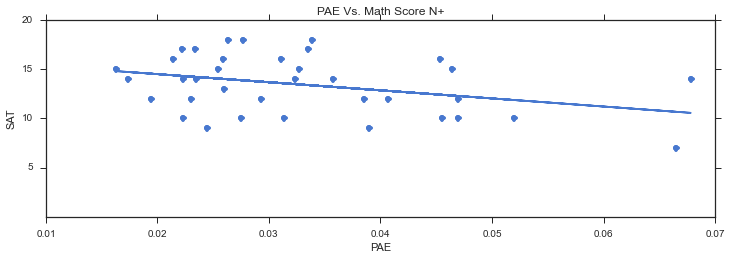

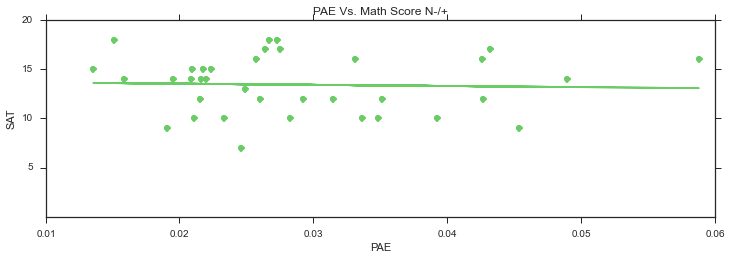

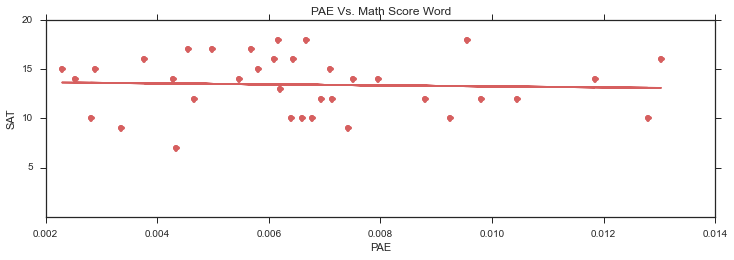

In [371]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(results_df['AbsError+'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsError+'],
          results_df['SAT'], 'o', color=pal[0])
plt.plot(results_df['AbsError+'], 
         m1*results_df['AbsError+'] + b1, '-', color=pal[0])
plt.title('PAE Vs. Math Score N+')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m2, b2 = np.polyfit(results_df['AbsError-'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsError-'],
          results_df['SAT'], 'o', color=pal[1])
plt.plot(results_df['AbsError-'], 
         m2*results_df['AbsError-'] + b2, '-', color=pal[1])
plt.title('PAE Vs. Math Score N-/+')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m3, b3 = np.polyfit(results_df['AbsErrorw'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsErrorw'],
          results_df['SAT'], 'o', color=pal[2])
plt.plot(results_df['AbsErrorw'], 
         m3*results_df['AbsErrorw'] + b3, '-', color=pal[2])
plt.title('PAE Vs. Math Score Word')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

In [372]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [373]:
slope1, intercept1, r1, p1, stderr1 = linregress(results_df['AbsError+'],results_df['SAT'])
slope2, intercept2, r2, p2, stderr2 = linregress(results_df['AbsError-'],results_df['SAT'])
slope3, intercept3, r3, p3, stderr3 = linregress(results_df['AbsErrorw'],results_df['SAT'])

### Slope +, Slope -, Slope w

In [374]:
print slope1, slope2, slope3

-82.3399905282 -11.6749900381 -51.0050654995


### r =, r -, r w

In [375]:
print r1, r2, r3

-0.351770602413 -0.0407424464437 -0.0475463787017


### R^2 +, R^2 -, R^2 w

In [376]:
print r1*r1, r2*r2, r3*r3

0.123742556722 0.00165994694222 0.00226065812765


### p-value +, p-value -, p-value w

In [377]:
print p1, p2, p3

0.0353867971765 0.813490651051 0.783035064675


In [378]:
np.corrcoef(results_df['slope-'], results_df['slope+'])

array([[ 1.        ,  0.24462269],
       [ 0.24462269,  1.        ]])

In [379]:
responses = position_tasks.Response.mean()

In [380]:
resp1 = responses.iloc[0:16]
resp2 = responses.iloc[16:32]
resp3 = responses.iloc[32:48]
resp1 = resp1.get_values()
resp2 = resp2.get_values()
resp3 = resp3.get_values()

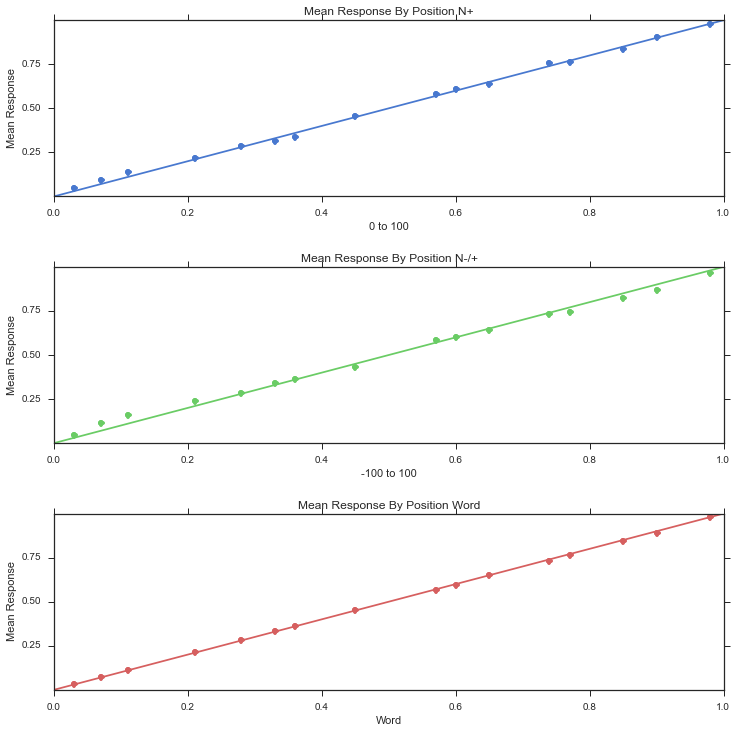

In [381]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, resp1, 'o', color=pal[0])
fig1.plot([0,1], [0,1], color=pal[0], linestyle='-')
plt.title('Mean Response By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([.25,.5,.75]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, resp2, 'o', color=pal[1])
fig2.plot([0,1], [0,1], color=pal[1], linestyle='-')
plt.title('Mean Response By Position N-/+')
plt.xlabel('-100 to 100', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([.25,.5,.75]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, resp3, 'o', color=pal[2])
fig3.plot([0,1], [0,1], color=pal[2], linestyle='-')
plt.title('Mean Response By Position Word')
plt.xlabel('Word', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([.25,.5,.75]))

plt.subplots_adjust(hspace=.4)